# 🖥️ الحوسبة عالية الأداء (HPC) - دورة جامعية شاملة

## دليل شامل للبرمجة المتوازية لأنظمة المعالجات المتعددة والعناقيد

---

**نظرة عامة على الدورة:**
تقدم هذه الدورة مقدمة شاملة للحوسبة عالية الأداء، تغطي البنى المتوازية ونماذج البرمجة وتقنيات المسرعات الحديثة. بنهاية هذه الدورة، ستفهم المبادئ الأساسية للحوسبة المتوازية وستكون قادراً على كتابة برامج متوازية فعالة.

**المتطلبات الأساسية:** معرفة أساسية بالبرمجة (C/Python)، فهم أساسيات بنية الحاسوب.

**هيكل الدورة:**

- **الفصل الأول:** مقدمة في الحوسبة المتوازية
- **الفصل الثاني:** نماذج وواجهات البرمجة المتوازية
- **الفصل الثالث:** الحوسبة على وحدة معالجة الرسومات (GPU)
- **الفصل الرابع:** التقنيات الناشئة في الحوسبة عالية الأداء

---

**المؤلف:** مبني على كتاب "البرمجة المتوازية لأنظمة المعالجات المتعددة والعناقيد" لـ Thomas Rauber و Gudula Rünger


# الفصل الأول: مقدمة في الحوسبة المتوازية

---

## 1.1 الحاجة إلى الحوسبة المتوازية

### 1.1.1 النظرية: لماذا الحوسبة المتوازية؟

**الدافع:**
البرمجة المتوازية وتصميم البرامج المتوازية الفعالة راسخة منذ سنوات عديدة في الحوسبة العلمية عالية الأداء. تعد محاكاة المشكلات العلمية مجالاً مهماً في العلوم الطبيعية والهندسية ذات أهمية متزايدة.

**المحركات الرئيسية للحوسبة المتوازية:**

1. **المحاكاة العلمية**

   - التنبؤ بالطقس باستخدام نماذج رياضية معقدة (المعادلات التفاضلية الجزئية)
   - محاكاة الاصطدام في صناعة السيارات باستخدام طرق العناصر المحدودة
   - تصميم الأدوية والديناميكا الجزيئية
   - رسومات الحاسوب للأفلام والإعلانات

2. **تطور العتاد**

   - **قانون مور**: يتضاعف عدد الترانزستورات كل 18-24 شهراً
   - تباطأت زيادات سرعة الساعة بسبب حدود تبديد الحرارة
   - **المعالجات متعددة النوى** أصبحت قياسية (ثنائية، رباعية، ثمانية النوى)
   - المعالجات المستقبلية ستحتوي على عشرات إلى مئات النوى

3. **ثورة المعالجات متعددة النوى**
   ```
   ┌─────────────────────────────────────────────────────┐
   │           تطور المعالجات                            │
   │                                                      │
   │   التسعينات: نواة واحدة ← 2005: نواتان             │
   │   2007: أربع نوى ← 2010+: نوى متعددة               │
   │                                                      │
   │   لماذا؟ قيود الفيزياء:                             │
   │   - استهلاك الطاقة ∝ التردد³                       │
   │   - حدود تبديد الحرارة                              │
   │   - مشكلة جدار الذاكرة                              │
   └─────────────────────────────────────────────────────┘
   ```

**الفكرة الأساسية:**

> _"لم يعد بإمكان مطوري البرمجيات توقع استخدام زيادة قوة الحوسبة تلقائياً بواسطة منتجاتهم البرمجية. بدلاً من ذلك، يلزم جهد إضافي على مستوى البرمجيات للاستفادة من قوة الحوسبة المتزايدة."_

### تطبيقات الحوسبة المتوازية

| المجال           | التطبيق         | لماذا التوازي؟                            |
| ---------------- | --------------- | ----------------------------------------- |
| الطقس            | التنبؤات        | معادلات تفاضلية معقدة، قيود الوقت الحقيقي |
| السيارات         | محاكاة الاصطدام | طرق العناصر المحدودة                      |
| الأدوية          | تصميم الأدوية   | الديناميكا الجزيئية                       |
| المالية          | تحليل المخاطر   | محاكاة مونت كارلو                         |
| الذكاء الاصطناعي | التعلم العميق   | عمليات المصفوفات                          |


In [1]:
# مثال 1.1: توضيح الحاجة إلى التوازي
# تقدير وقت الحساب التسلسلي مقابل المتوازي

import time
import numpy as np

def sequential_matrix_multiply(A, B):
    """ضرب المصفوفات التسلسلي - O(n³)"""
    n = len(A)
    C = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i][j] += A[i][k] * B[k][j]
    return C

# محاكاة وقت الحساب لأحجام مختلفة من المشكلات
print("=" * 60)
print("توضيح: لماذا نحتاج الحوسبة المتوازية")
print("=" * 60)

problem_sizes = [100, 200, 400]
for n in problem_sizes:
    # الوقت التسلسلي النظري (يتناسب مع n³)
    seq_ops = n ** 3
    # مع p معالجات، الوقت المتوازي المثالي
    p = 4  # 4 نوى
    parallel_ops = seq_ops / p
    
    print(f"\nحجم المصفوفة: {n}x{n}")
    print(f"  العمليات التسلسلية: {seq_ops:,}")
    print(f"  العمليات المتوازية (4 نوى): {parallel_ops:,.0f}")
    print(f"  التسريع النظري: {p}x")

print("\n" + "=" * 60)
print("النتيجة الرئيسية: المشكلات الأكبر تستفيد أكثر من التوازي!")
print("=" * 60)

توضيح: لماذا نحتاج الحوسبة المتوازية

حجم المصفوفة: 100x100
  العمليات التسلسلية: 1,000,000
  العمليات المتوازية (4 نوى): 250,000
  التسريع النظري: 4x

حجم المصفوفة: 200x200
  العمليات التسلسلية: 8,000,000
  العمليات المتوازية (4 نوى): 2,000,000
  التسريع النظري: 4x

حجم المصفوفة: 400x400
  العمليات التسلسلية: 64,000,000
  العمليات المتوازية (4 نوى): 16,000,000
  التسريع النظري: 4x

النتيجة الرئيسية: المشكلات الأكبر تستفيد أكثر من التوازي!


## 1.2 القوانين الأساسية للحوسبة المتوازية

### 1.2.1 المفاهيم والمصطلحات الأساسية

**تحليل المهام:**
يبدأ تصميم الخوارزمية المتوازية بـ**تحليل** الحسابات إلى عدة أجزاء تسمى **المهام**، والتي يمكن حسابها بشكل متوازٍ.

```
┌─────────────────────────────────────────────────────────────┐
│                  سير عمل التوازي                            │
├─────────────────────────────────────────────────────────────┤
│                                                              │
│  خوارزمية    ┌─────────┐    متوازية                        │
│  تسلسلية ───►│ تحليل   ├───► مهام ────┐                     │
│              └─────────┘             │                      │
│                                      ▼                      │
│                            ┌─────────────────┐              │
│                            │    الجدولة      │              │
│                            │ (تعيين المهام   │              │
│                            │  للخيوط)        │              │
│                            └────────┬────────┘              │
│                                     │                       │
│                                     ▼                       │
│                            ┌─────────────────┐              │
│                            │    التعيين      │              │
│                            │ (الخيوط إلى     │              │
│                            │  المعالجات)     │              │
│                            └─────────────────┘              │
└─────────────────────────────────────────────────────────────┘
```

**المصطلحات الرئيسية:**

| المصطلح                       | التعريف                                    |
| ----------------------------- | ------------------------------------------ |
| **المهمة (Task)**             | وحدة حساب يمكن تنفيذها بشكل مستقل          |
| **الدقة (Granularity)**       | حجم المهام (دقيقة مقابل خشنة)              |
| **العملية (Process)**         | تدفق تحكم مستقل بمساحة عنوان خاصة          |
| **الخيط (Thread)**            | تدفق تحكم خفيف يشارك مساحة العنوان         |
| **الجدولة (Scheduling)**      | تعيين المهام للعمليات/الخيوط               |
| **التعيين (Mapping)**         | تعيين العمليات/الخيوط للمعالجات الفيزيائية |
| **التزامن (Synchronization)** | التنسيق بين وحدات التنفيذ المتوازية        |

### 1.2.2 نماذج تنظيم الذاكرة

**فئتان رئيسيتان:**

1. **الذاكرة المشتركة (Shared Memory)**

   - جميع المعالجات تصل إلى ذاكرة عالمية
   - التواصل عبر المتغيرات المشتركة
   - يتطلب التزامن للوصول الصحيح
   - أمثلة: المعالجات متعددة النوى، أنظمة SMP

2. **الذاكرة الموزعة (Distributed Memory)**
   - لكل معالج ذاكرة محلية خاصة
   - التواصل عبر تمرير الرسائل
   - لا يوجد وصول للذاكرة المشتركة
   - أمثلة: العناقيد، الحواسيب الفائقة

```
الذاكرة المشتركة                    الذاكرة الموزعة

   P₁   P₂   P₃   P₄               P₁   P₂   P₃   P₄
    │    │    │    │                │    │    │    │
    └────┴────┴────┘                M₁   M₂   M₃   M₄
           │                        │    │    │    │
    ┌──────┴──────┐                └────┴────┴────┘
    │   ذاكرة     │                      │
    │   مشتركة   │              شبكة الربط البيني
    └─────────────┘
```


### 1.2.3 التسريع (Speedup)

**التعريف:** نسبة وقت التنفيذ التسلسلي إلى وقت التنفيذ المتوازي.

$$S(p) = \frac{T_{sequential}}{T_{parallel}(p)}$$

حيث:

- $T_{sequential}$ = وقت التنفيذ على معالج واحد
- $T_{parallel}(p)$ = وقت التنفيذ على $p$ معالج

**أنواع التسريع:**

- **تسريع خطي:** $S(p) = p$ (مثالي)
- **تسريع فوق خطي:** $S(p) > p$ (نادر، عادة بسبب تأثيرات الذاكرة المؤقتة)
- **تسريع دون خطي:** $S(p) < p$ (الحالة الشائعة)

```
تسريع
  ▲
p │                    ╱ خطي (مثالي)
  │                  ╱
  │                ╱
  │              ╱  ........ فوق خطي (نادر)
  │            ╱ ...
  │          ╱...
  │        ╱.    ──────── دون خطي (نموذجي)
  │      ╱.   ─────
  │    ╱. ────
  │  ╱.──
  │╱─
  └────────────────────────────► عدد المعالجات (p)
```

### 1.2.4 قانون أمدال (Amdahl's Law)

**الصياغة:** يحدد قانون أمدال الحد الأقصى للتسريع بناءً على الجزء التسلسلي.

إذا كان $f$ هو الجزء المتوازي من البرنامج:

$$S(p) = \frac{1}{(1-f) + \frac{f}{p}}$$

**الحد الأقصى للتسريع:**
$$\lim_{p \to \infty} S(p) = \frac{1}{1-f}$$

**الاستنتاجات الرئيسية:**

- حتى 5% تسلسلي → الحد الأقصى للتسريع = 20x
- 10% تسلسلي → الحد الأقصى للتسريع = 10x
- 50% تسلسلي → الحد الأقصى للتسريع = 2x

```
تسريع بقانون أمدال

20 │    f=95%────────────────────────────
   │         ╱─────────
15 │        ╱
   │       ╱
10 │    f=90%────────────────
   │      ╱───────
   │     ╱
 5 │   ╱   f=80%────────
   │  ╱     ╱─────
 2 │ ╱    f=50%───
   │╱    ╱──
 1 │────╱
   └──────────────────────────────►
    1    16   32   64   128   ∞
              عدد المعالجات
```


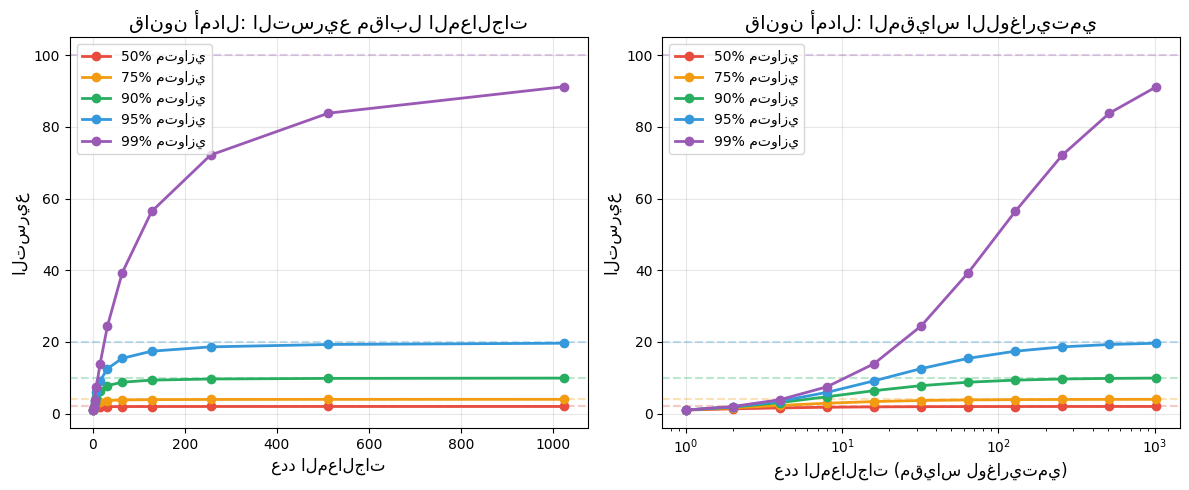

تحليل قانون أمدال

الحد الأقصى للتسريع حسب الجزء التسلسلي:
---------------------------------------------
    50% تسلسلي (50% متوازي): الحد الأقصى =    2.0x
    25% تسلسلي (75% متوازي): الحد الأقصى =    4.0x
    10% تسلسلي (90% متوازي): الحد الأقصى =   10.0x
     5% تسلسلي (95% متوازي): الحد الأقصى =   20.0x
     1% تسلسلي (99% متوازي): الحد الأقصى =  100.0x
---------------------------------------------


In [2]:
# مثال 1.2: تصور قانون أمدال
import numpy as np
import matplotlib.pyplot as plt

def amdahl_speedup(p, f):
    """
    حساب التسريع باستخدام قانون أمدال
    p: عدد المعالجات
    f: الجزء المتوازي (0 إلى 1)
    """
    return 1 / ((1 - f) + f / p)

# إعداد المعالجات
processors = np.array([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024])
parallel_fractions = [0.5, 0.75, 0.9, 0.95, 0.99]
colors = ['#e74c3c', '#f39c12', '#27ae60', '#3498db', '#9b59b6']
labels_ar = ['50% متوازي', '75% متوازي', '90% متوازي', '95% متوازي', '99% متوازي']

plt.figure(figsize=(12, 5))

# الرسم البياني 1: مقياس خطي
plt.subplot(1, 2, 1)
for f, color, label in zip(parallel_fractions, colors, labels_ar):
    speedups = [amdahl_speedup(p, f) for p in processors]
    plt.plot(processors, speedups, 'o-', color=color, label=label, linewidth=2, markersize=6)
    # إضافة الحد الأقصى للتسريع
    max_speedup = 1 / (1 - f)
    plt.axhline(y=max_speedup, color=color, linestyle='--', alpha=0.3)

plt.xlabel('عدد المعالجات', fontsize=12)
plt.ylabel('التسريع', fontsize=12)
plt.title('قانون أمدال: التسريع مقابل المعالجات', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)

# الرسم البياني 2: مقياس لوغاريتمي
plt.subplot(1, 2, 2)
for f, color, label in zip(parallel_fractions, colors, labels_ar):
    speedups = [amdahl_speedup(p, f) for p in processors]
    plt.semilogx(processors, speedups, 'o-', color=color, label=label, linewidth=2, markersize=6)
    max_speedup = 1 / (1 - f)
    plt.axhline(y=max_speedup, color=color, linestyle='--', alpha=0.3)

plt.xlabel('عدد المعالجات (مقياس لوغاريتمي)', fontsize=12)
plt.ylabel('التسريع', fontsize=12)
plt.title('قانون أمدال: المقياس اللوغاريتمي', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# تحليل كمي
print("=" * 65)
print("تحليل قانون أمدال")
print("=" * 65)
print("\nالحد الأقصى للتسريع حسب الجزء التسلسلي:")
print("-" * 45)
for f in parallel_fractions:
    serial = 1 - f
    max_s = 1 / serial
    print(f"  {serial*100:4.0f}% تسلسلي ({f*100:2.0f}% متوازي): الحد الأقصى = {max_s:6.1f}x")
print("-" * 45)

### 1.2.5 قانون غوستافسون (Gustafson's Law)

**المنظور:** بدلاً من إصلاح حجم المشكلة، ماذا لو قمنا بتوسيع المشكلة مع المعالجات؟

**الصياغة:**

$$S_{scaled}(p) = p - \alpha(p-1)$$

حيث $\alpha$ هو الجزء التسلسلي من عبء العمل الموازي.

**مقارنة وجهات النظر:**

```
قانون أمدال (التوسيع القوي)    قانون غوستافسون (التوسيع الضعيف)
─────────────────────────────  ───────────────────────────────────
حجم مشكلة ثابت               حجم المشكلة يتوسع مع المعالجات
يقيس: "كم أسرع؟"            يقيس: "كم أكبر يمكن أن نحل؟"
متشائم: محدود بالتسلسلي      متفائل: يمكن تحقيق تسريع خطي
```

**مثال عملي:**

```
                أمدال: إصلاح حجم المشكلة
معالج واحد:   [===تسلسلي===][=========متوازي=========]
4 معالجات:    [===تسلسلي===][==]  العمل الإجمالي ثابت
              وقت أقل، نفس العمل

              غوستافسون: توسيع حجم المشكلة
معالج واحد:   [=S=][====P====]
4 معالجات:    [=S=][====P₁====][====P₂====][====P₃====][====P₄====]
              نفس الوقت، عمل أكثر!
```

### 1.2.6 الكفاءة (Efficiency)

**التعريف:** مدى الاستخدام الفعال للمعالجات

$$E(p) = \frac{S(p)}{p} = \frac{T_{sequential}}{p \cdot T_{parallel}(p)}$$

**المدى:**

- $E = 1$ (100%): كفاءة مثالية
- $E < 1$: بعض الحمل الزائد أو عدم التوازن

**مقايضة التسريع-الكفاءة:**

| المعالجات | التسريع | الكفاءة | الملاحظات     |
| --------- | ------- | ------- | ------------- |
| 1         | 1.0     | 100%    | خط الأساس     |
| 2         | 1.8     | 90%     | جيد           |
| 4         | 3.2     | 80%     | مقبول         |
| 8         | 5.6     | 70%     | عوائد متناقصة |
| 16        | 8.0     | 50%     | حمل زائد كبير |


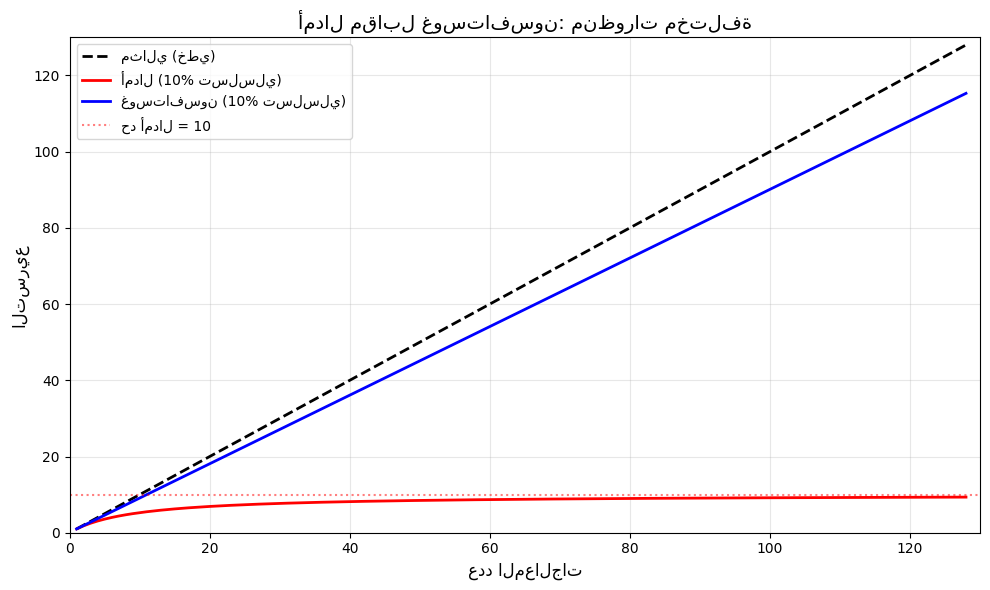

مقارنة: أمدال مقابل غوستافسون (10% تسلسلي)
   المعالجات        أمدال       غوستافسون      مثالي
----------------------------------------------------------------------
           1         1.00            1.00          1
           2         1.82            1.90          2
           4         3.08            3.70          4
           8         4.71            7.30          8
          16         6.40           14.50         16
          32         7.80           28.90         32
          64         8.77           57.70         64
         128         9.34          115.30        128
----------------------------------------------------------------------

💡 الاستنتاج الرئيسي:
   أمدال: الحد الأقصى للتسريع = 10x (محدود بالجزء التسلسلي)
   غوستافسون: التسريع يتوسع خطياً تقريباً!

📊 التفسير:
   - أمدال: 'بنفس المشكلة، كم أسرع يمكنني الحل؟'
   - غوستافسون: 'بنفس الوقت، كم أكبر يمكنني الحل؟'


In [3]:
# مثال 1.3: مقارنة قانون أمدال وقانون غوستافسون
import numpy as np
import matplotlib.pyplot as plt

def amdahl(p, f):
    """قانون أمدال: حجم مشكلة ثابت"""
    return 1 / ((1 - f) + f / p)

def gustafson(p, alpha):
    """قانون غوستافسون: حجم مشكلة متوسع"""
    return p - alpha * (p - 1)

processors = np.arange(1, 129)
serial_fraction = 0.1  # 10% تسلسلي، 90% متوازي

# حساب التسريع
amdahl_speedup = [amdahl(p, 0.9) for p in processors]
gustafson_speedup = [gustafson(p, 0.1) for p in processors]
ideal_speedup = processors  # تسريع خطي

# رسم بياني
plt.figure(figsize=(10, 6))
plt.plot(processors, ideal_speedup, 'k--', label='مثالي (خطي)', linewidth=2)
plt.plot(processors, amdahl_speedup, 'r-', label='أمدال (10% تسلسلي)', linewidth=2)
plt.plot(processors, gustafson_speedup, 'b-', label='غوستافسون (10% تسلسلي)', linewidth=2)

# إضافة الحد الأقصى لأمدال
max_amdahl = 1 / 0.1
plt.axhline(y=max_amdahl, color='r', linestyle=':', alpha=0.5, label=f'حد أمدال = {max_amdahl:.0f}')

plt.xlabel('عدد المعالجات', fontsize=12)
plt.ylabel('التسريع', fontsize=12)
plt.title('أمدال مقابل غوستافسون: منظورات مختلفة', fontsize=14)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(0, 130)
plt.ylim(0, 130)

plt.tight_layout()
plt.show()

# مقارنة رقمية
print("=" * 70)
print("مقارنة: أمدال مقابل غوستافسون (10% تسلسلي)")
print("=" * 70)
print(f"{'المعالجات':>12} {'أمدال':>12} {'غوستافسون':>15} {'مثالي':>10}")
print("-" * 70)
for p in [1, 2, 4, 8, 16, 32, 64, 128]:
    a = amdahl(p, 0.9)
    g = gustafson(p, 0.1)
    print(f"{p:>12} {a:>12.2f} {g:>15.2f} {p:>10}")
print("-" * 70)
print(f"\n💡 الاستنتاج الرئيسي:")
print(f"   أمدال: الحد الأقصى للتسريع = {max_amdahl:.0f}x (محدود بالجزء التسلسلي)")
print(f"   غوستافسون: التسريع يتوسع خطياً تقريباً!")
print(f"\n📊 التفسير:")
print(f"   - أمدال: 'بنفس المشكلة، كم أسرع يمكنني الحل؟'")
print(f"   - غوستافسون: 'بنفس الوقت، كم أكبر يمكنني الحل؟'")

## 1.3 تصنيف فلين (Flynn's Taxonomy)

### 1.3.1 نظرة عامة

تصنيف فلين (1966) يصنف معماريات الحاسوب بناءً على تدفقات التعليمات والبيانات:

```
                        تدفق البيانات
                    مفرد          متعدد
                 ┌─────────┬─────────────┐
      مفرد       │  SISD   │    SIMD     │
تدفق             │(تسلسلي) │(معالجات     │
التعليمات        │         │ المصفوفات)  │
                 ├─────────┼─────────────┤
      متعدد      │  MISD   │    MIMD     │
                 │ (نادر)  │(متعدد       │
                 │         │ المعالجات)  │
                 └─────────┴─────────────┘
```

### 1.3.2 SISD (تعليمة واحدة، بيانات واحدة)

**التعريف:** معالج واحد ينفذ تعليمة واحدة على عنصر بيانات واحد في كل مرة.

**الخصائص:**

- المعمارية التسلسلية الكلاسيكية
- مثال: معالجات Intel/AMD القديمة بنواة واحدة
- نموذج von Neumann

```
┌─────────────────────────────────────────────────┐
│                    SISD                         │
│  تعليمة   ┌─────────┐   بيانات                 │
│  واحدة ──►│  معالج  │◄── واحدة                 │
│           │         │                           │
│           │   CU    │   ناتج                    │
│           │  ┌───┐  │────────►                  │
│           │  │PU │  │                           │
│           └──┴───┴──┘                           │
│                                                 │
│  CU = وحدة التحكم                              │
│  PU = وحدة المعالجة                            │
└─────────────────────────────────────────────────┘
```

### 1.3.3 SIMD (تعليمة واحدة، بيانات متعددة)

**التعريف:** تعليمة واحدة تعمل على عناصر بيانات متعددة في وقت واحد.

**الخصائص:**

- نفس العملية على عناصر بيانات مختلفة
- عمليات المتجهات في وحدات المعالجة المركزية الحديثة (SSE، AVX)
- أنوية GPU
- مثالي للمعالجة المنتظمة المتوازية للبيانات

**أمثلة:**

- تعليمات Intel AVX-512: 16 عملية عائمة في دورة واحدة
- أنوية CUDA: آلاف الخيوط تنفذ نفس التعليمة

```
┌─────────────────────────────────────────────────────┐
│                       SIMD                          │
│           تعليمة واحدة                              │
│                │                                    │
│    ┌───────────┼───────────┐                       │
│    │     │     │     │     │                       │
│    ▼     ▼     ▼     ▼     ▼                       │
│ ┌─────┐┌─────┐┌─────┐┌─────┐┌─────┐                │
│ │ D₀  ││ D₁  ││ D₂  ││ D₃  ││ D₄  │                │
│ └─────┘└─────┘└─────┘└─────┘└─────┘                │
└─────────────────────────────────────────────────────┘
           نفس التعليمة، بيانات مختلفة
```

### 1.3.4 MISD (تعليمات متعددة، بيانات واحدة)

**التعريف:** معالجات متعددة تنفذ تعليمات مختلفة على نفس تدفق البيانات.

**الخصائص:**

- نادر جداً في الممارسة
- يُستخدم أساساً للتحمل الأعطال (الحساب المكرر)
- حواسيب التحكم في رحلات المكوك الفضائي

**ملاحظة:** MISD له تطبيقات عملية محدودة ويُعتبر غالباً ذو أهمية نظرية.

### 1.3.5 MIMD (تعليمات متعددة، بيانات متعددة)

**التعريف:** معالجات متعددة تنفذ تعليمات مختلفة على بيانات مختلفة.

**الخصائص:**

- أكثر معماريات التوازي مرونة
- كل معالج يمكنه العمل بشكل مستقل
- يمكن تصنيفها إلى:

```
                           MIMD
                             │
             ┌───────────────┴───────────────┐
             │                               │
      الذاكرة المشتركة               الذاكرة الموزعة
             │                               │
      ┌──────┴──────┐                 ┌──────┴──────┐
      │             │                 │             │
     UMA          NUMA           العناقيد       MPP
  (منتظم)      (غير منتظم)      (سلعي)       (مخصص)
```

**تصنيفات MIMD الفرعية:**

| النوع                      | الذاكرة            | الاتصال       | أمثلة                    |
| -------------------------- | ------------------ | ------------- | ------------------------ |
| **الذاكرة المشتركة (SMP)** | مساحة عنوان مشتركة | عبر الذاكرة   | المعالجات متعددة النوى   |
| **الذاكرة الموزعة**        | خاصة لكل معالج     | تمرير الرسائل | العناقيد، MPP            |
| **هجين**                   | كلاهما             | كلاهما        | الحواسيب الفائقة الحديثة |


In [4]:
# مثال 1.4: توضيح معالجة SIMD مقابل المعالجة التسلسلية
import numpy as np
import time

# إنشاء مصفوفات كبيرة
size = 10_000_000
a = np.random.rand(size)
b = np.random.rand(size)

# الطريقة 1: حلقة Python (تسلسلية - نمط SISD)
def sequential_add(a, b):
    result = np.empty(len(a))
    for i in range(len(a)):
        result[i] = a[i] + b[i]
    return result

# الطريقة 2: NumPy المُتجهة (تستخدم SIMD داخلياً)
def vectorized_add(a, b):
    return a + b

# قياس الأداء (باستخدام مصفوفة أصغر للتسلسلية لتوفير الوقت)
small_size = 100_000
a_small = a[:small_size]
b_small = b[:small_size]

# توقيت التسلسلية
start = time.time()
result_seq = sequential_add(a_small, b_small)
seq_time = time.time() - start

# توقيت المُتجهة (على المصفوفة الكاملة)
start = time.time()
result_vec = vectorized_add(a, b)
vec_time = time.time() - start

# حساب التسريع المعدل
vec_time_adjusted = vec_time * (small_size / size)
speedup = seq_time / vec_time_adjusted

print("=" * 60)
print("مقارنة المعالجة SIMD مقابل التسلسلية")
print("=" * 60)
print(f"\n📊 التسلسلية (حلقة Python) على {small_size:,} عنصر:")
print(f"   الوقت: {seq_time*1000:.2f} مللي ثانية")
print(f"\n⚡ المُتجهة (NumPy SIMD) على {size:,} عنصر:")
print(f"   الوقت: {vec_time*1000:.2f} مللي ثانية")
print(f"   الوقت المعدل لـ {small_size:,}: {vec_time_adjusted*1000:.4f} مللي ثانية")
print(f"\n🚀 التسريع المقدر: {speedup:.1f}x")
print(f"\n💡 التفسير:")
print("   NumPy تستخدم مكتبات BLAS المحسنة التي تستفيد من")
print("   تعليمات SIMD (مثل SSE و AVX) لمعالجة عناصر متعددة")
print("   في وقت واحد في تعليمة CPU واحدة.")

مقارنة المعالجة SIMD مقابل التسلسلية

📊 التسلسلية (حلقة Python) على 100,000 عنصر:
   الوقت: 38.30 مللي ثانية

⚡ المُتجهة (NumPy SIMD) على 10,000,000 عنصر:
   الوقت: 27.10 مللي ثانية
   الوقت المعدل لـ 100,000: 0.2710 مللي ثانية

🚀 التسريع المقدر: 141.3x

💡 التفسير:
   NumPy تستخدم مكتبات BLAS المحسنة التي تستفيد من
   تعليمات SIMD (مثل SSE و AVX) لمعالجة عناصر متعددة
   في وقت واحد في تعليمة CPU واحدة.


## 1.4 شبكات الربط البيني (Interconnection Networks)

### 1.4.1 مقدمة

شبكات الربط البيني تمكّن الاتصال بين المعالجات والذاكرة في الأنظمة المتوازية. تصميمها يؤثر بشكل حاسم على الأداء.

**المقاييس الرئيسية:**

- **عرض النطاق الترددي:** معدل نقل البيانات (جيجابايت/ثانية)
- **زمن الاستجابة:** الوقت اللازم لوصول الرسالة من المصدر إلى الوجهة
- **عرض نطاق القطع:** الحد الأدنى لعرض النطاق عند قطع الشبكة إلى نصفين
- **القطر:** أقصى مسافة بين أي عقدتين
- **درجة العقدة:** عدد الروابط لكل عقدة

### 1.4.2 الشبكات الثابتة (المباشرة)

المعالجات متصلة مباشرة ببعضها عبر روابط ثابتة.

**المصفوفة الخطية:**

```
┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐
│ 0 │───│ 1 │───│ 2 │───│ 3 │───│ 4 │
└───┘   └───┘   └───┘   └───┘   └───┘

القطر: n-1    درجة العقدة: 2
```

**الحلقة (Torus أحادي البعد):**

```
        ┌───────────────────────────┐
        │                           │
      ┌───┐   ┌───┐   ┌───┐   ┌───┐
      │ 0 │───│ 1 │───│ 2 │───│ 3 │
      └───┘   └───┘   └───┘   └───┘
```

**الشبكة ثنائية الأبعاد:**

```
┌───┐───┌───┐───┌───┐───┌───┐
│0,0│   │0,1│   │0,2│   │0,3│
└─┬─┘   └─┬─┘   └─┬─┘   └─┬─┘
  │       │       │       │
┌─┴─┐   ┌─┴─┐   ┌─┴─┐   ┌─┴─┐
│1,0│───│1,1│───│1,2│───│1,3│
└─┬─┘   └─┬─┘   └─┬─┘   └─┬─┘
  │       │       │       │
┌─┴─┐   ┌─┴─┐   ┌─┴─┐   ┌─┴─┐
│2,0│───│2,1│───│2,2│───│2,3│
└───┘   └───┘   └───┘   └───┘

القطر: 2(√n - 1)    درجة العقدة: 4
تُستخدم في: الحواسيب الفائقة، معماريات GPU
```

**المكعب الفائق (Hypercube):**

```
مكعب فائق بأبعاد d: 2^d عقدة

d=3 (8 عقد):            القطر: d = log₂(n)
                        درجة العقدة: d = log₂(n)
    100─────────110
    /│          /│
   / │         / │
  000─────────010│
   │ │         │ │
   │ 101───────│─111
   │ /         │ /
   │/          │/
  001─────────011
```

### 1.4.3 الشبكات الديناميكية (غير المباشرة)

المبدلات توجه الرسائل ديناميكياً بين المعالجات.

**الناقل (Bus):**

```
┌─────────────────────────────────────────┐
│              الناقل المشترك             │
└───┬────────┬────────┬────────┬─────────┘
    │        │        │        │
  ┌─┴─┐    ┌─┴─┐    ┌─┴─┐    ┌─┴─┐
  │P0 │    │P1 │    │P2 │    │P3 │
  └───┘    └───┘    └───┘    └───┘

بسيط لكن قابلية توسع محدودة (تنافس)
```

**المصفوفة المتقاطعة (Crossbar):**

```
         M0    M1    M2    M3
         │     │     │     │
    ─────●─────●─────●─────●───── P0
         │     │     │     │
    ─────●─────●─────●─────●───── P1
         │     │     │     │
    ─────●─────●─────●─────●───── P2
         │     │     │     │
    ─────●─────●─────●─────●───── P3

● = نقطة تبديل
اتصال كامل، بدون حجب
التكلفة: O(n²) مبدلات
```

**الشجرة السمينة (Fat Tree) - تُستخدم في InfiniBand:**

```
                 الجذر
               /      \
              /        \
           مبدل      مبدل
          /     \    /     \
         /       \  /       \
       S    S    S    S
      /\   /\   /\   /\
     P P  P P  P P  P P

عرض نطاق متزايد نحو الجذر
تُستخدم في: مراكز البيانات، عناقيد HPC
```

### 1.4.4 جدول المقارنة

| الشبكة             | القطر   | درجة العقدة | التكلفة    | قابلية التوسع |
| ------------------ | ------- | ----------- | ---------- | ------------- |
| المصفوفة الخطية    | n-1     | 2           | O(n)       | ضعيفة         |
| الحلقة             | n/2     | 2           | O(n)       | ضعيفة         |
| الشبكة 2D          | 2(√n-1) | 4           | O(n)       | جيدة          |
| Torus 2D           | √n      | 4           | O(n)       | جيدة          |
| المكعب الفائق      | log₂n   | log₂n       | O(n log n) | جيدة          |
| المصفوفة المتقاطعة | 1       | n           | O(n²)      | محدودة        |
| الشجرة السمينة     | 2 log n | متغير       | O(n log n) | ممتازة        |


## 1.5 ترابط الذاكرة المؤقتة والتزامن

### 1.5.1 مشكلة ترابط الذاكرة المؤقتة

في المعالجات المتعددة ذات الذاكرة المشتركة، كل معالج له ذاكرة مؤقتة خاصة. عندما تحتفظ ذاكرات مؤقتة متعددة بنسخ من نفس موقع الذاكرة، تنشأ مشاكل **ترابط الذاكرة المؤقتة**.

**سيناريو المشكلة:**

```
الحالة الأولية: Memory[X] = 0

الوقت    P0 (Cache₀)        P1 (Cache₁)        Memory[X]
─────────────────────────────────────────────────────────
t0      قراءة X             -                  0
        Cache₀[X] = 0
t1      -                  قراءة X             0
                           Cache₁[X] = 0
t2      كتابة X = 1        -                  0 (أو 1؟)
        Cache₀[X] = 1      Cache₁[X] = 0  ← غير مترابط!
t3      -                  قراءة X             ???
                           يحصل على 0 (قديم!)
```

### 1.5.2 بروتوكولات ترابط الذاكرة المؤقتة

**بروتوكول MESI** (الأكثر شيوعاً):

كل سطر في الذاكرة المؤقتة له حالة:

- **M (Modified/معدل):** السطر متسخ، موجود فقط في هذه الذاكرة المؤقتة
- **E (Exclusive/حصري):** السطر نظيف، موجود فقط في هذه الذاكرة المؤقتة
- **S (Shared/مشترك):** السطر قد يكون في ذاكرات مؤقتة أخرى
- **I (Invalid/غير صالح):** السطر غير صالح

```
انتقالات الحالة:

        ┌────────────────────────────────┐
        │                                │
        ▼                                │
    ┌───────┐   إصابة قراءة    ┌───────┐  │
    │   I   │ ───────────────→│   S   │──┘
    │غير صالح│                │مشترك │
    └───┬───┘                 └───┬───┘
        │                         │
        │ فقدان قراءة              │ كتابة
        │ (لا نسخة أخرى)          │
        ▼                         ▼
    ┌───────┐   كتابة        ┌───────┐
    │   E   │───────────────→│   M   │
    │حصري  │                │معدل  │
    └───────┘                └───────┘
```

### 1.5.3 المشاركة الزائفة (False Sharing)

**التعريف:** عندما يصل معالجان إلى متغيرات مختلفة موجودة في نفس سطر الذاكرة المؤقتة، مما يسبب حركة ترابط غير ضرورية.

```
┌─────────────────────────────────────┐
│     سطر الذاكرة المؤقتة (64 بايت)   │
│  ┌───────────┐    ┌───────────┐     │
│  │  متغير    │    │  متغير    │     │
│  │ الخيط 0   │    │ الخيط 1   │     │
│  └───────────┘    └───────────┘     │
└─────────────────────────────────────┘
         ↑                ↑
    P0 يكتب          P1 يكتب
         ↓                ↓
  السطر بأكمله       السطر يُبطل
  يُبطل في ذاكرة     → إعادة جلب مطلوبة
  P1 المؤقتة
```

**الحل:** حشو هياكل البيانات لتجنب مشاركة أسطر الذاكرة المؤقتة:

```c
// سيء: المتغيرات في نفس سطر الذاكرة المؤقتة
int counter0;  // الخيط 0
int counter1;  // الخيط 1

// جيد: كل متغير في سطر ذاكرة مؤقتة خاص به
struct aligned_counter {
    int value;
    char padding[60];  // بافتراض سطر 64 بايت
};
```

### 1.5.4 بدائيات التزامن

**Mutex (الإقصاء المتبادل):**

```
الخيط 0                     الخيط 1
─────────                   ─────────
lock(mutex)                 lock(mutex)
  المقطع الحرج                ← يُحجب (ينتظر)
unlock(mutex)
                             المقطع الحرج
                            unlock(mutex)
```

**الحاجز (Barrier):**

```
الخيط 0     الخيط 1     الخيط 2     الخيط 3
────────    ────────    ────────    ────────
work()      work()      work()      work()
   │           │           │           │
   │           │           │           │
   ▼           ▼           ▼           ▼
╔══════════════════════════════════════════╗
║      الحاجز (يجب أن يصل الجميع)          ║
╚══════════════════════════════════════════╝
   │           │           │           │
   ▼           ▼           ▼           ▼
next()      next()      next()      next()
```

**العمليات الذرية:**

- المقارنة والتبديل (CAS)
- الاختبار والتعيين (Test-and-Set)
- الجلب والإضافة (Fetch-and-Add)

هذه عمليات مدعومة بالعتاد تكتمل دون مقاطعة.


In [5]:
# مثال 1.5: توضيح تأثير المشاركة الزائفة
import numpy as np
import threading
import time

def demonstrate_false_sharing():
    """مقارنة الأداء مع وبدون المشاركة الزائفة"""
    
    iterations = 10_000_000
    num_threads = 4
    
    # السيناريو 1: العدادات في نفس المصفوفة (مشاركة زائفة محتملة)
    shared_counters = np.zeros(num_threads, dtype=np.int64)
    
    # السيناريو 2: العدادات مع حشو (كل منها في سطر ذاكرة مؤقتة منفصل)
    # بافتراض أسطر ذاكرة مؤقتة 64 بايت، int64 = 8 بايت، لذا نحشو بـ 7 int64 إضافية
    padded_counters = np.zeros(num_threads * 8, dtype=np.int64)
    
    def increment_shared(thread_id, counts):
        for _ in range(iterations):
            counts[thread_id] += 1
    
    def increment_padded(thread_id, counts):
        idx = thread_id * 8  # 64 بايت متباعدة
        for _ in range(iterations):
            counts[idx] += 1
    
    # قياس أداء المشتركة
    threads = []
    start = time.time()
    for i in range(num_threads):
        t = threading.Thread(target=increment_shared, args=(i, shared_counters))
        threads.append(t)
        t.start()
    for t in threads:
        t.join()
    shared_time = time.time() - start
    
    # قياس أداء المحشوة
    threads = []
    start = time.time()
    for i in range(num_threads):
        t = threading.Thread(target=increment_padded, args=(i, padded_counters))
        threads.append(t)
        t.start()
    for t in threads:
        t.join()
    padded_time = time.time() - start
    
    return shared_time, padded_time

# ملاحظة: التأثير قد يكون أقل وضوحاً بسبب GIL في Python
# التأثير أكثر دراماتيكية في C/C++ مع الخيوط الحقيقية

print("=" * 60)
print("توضيح تأثير المشاركة الزائفة")
print("=" * 60)
print("\n⚠️  ملاحظة: بسبب GIL في Python، التأثير قد يكون محدوداً")
print("   في C/C++ مع الخيوط الحقيقية، الفرق يمكن أن يكون 10x أو أكثر!")

shared_time, padded_time = demonstrate_false_sharing()

print(f"\n📊 النتائج:")
print(f"   العدادات المشتركة (مشاركة زائفة): {shared_time:.3f} ثانية")
print(f"   العدادات المحشوة (بدون مشاركة):   {padded_time:.3f} ثانية")
print(f"   نسبة الأداء: {shared_time/padded_time:.2f}x")

print(f"\n💡 التفسير:")
print("   المشاركة الزائفة تحدث عندما تشارك الخيوط سطر ذاكرة مؤقتة")
print("   حتى لو كانت تصل إلى متغيرات مختلفة، مما يسبب إبطالات متكررة.")
print("   الحشو يضمن أن كل متغير في سطر ذاكرة مؤقتة خاص به.")

توضيح تأثير المشاركة الزائفة

⚠️  ملاحظة: بسبب GIL في Python، التأثير قد يكون محدوداً
   في C/C++ مع الخيوط الحقيقية، الفرق يمكن أن يكون 10x أو أكثر!

📊 النتائج:
   العدادات المشتركة (مشاركة زائفة): 16.104 ثانية
   العدادات المحشوة (بدون مشاركة):   16.961 ثانية
   نسبة الأداء: 0.95x

💡 التفسير:
   المشاركة الزائفة تحدث عندما تشارك الخيوط سطر ذاكرة مؤقتة
   حتى لو كانت تصل إلى متغيرات مختلفة، مما يسبب إبطالات متكررة.
   الحشو يضمن أن كل متغير في سطر ذاكرة مؤقتة خاص به.


## 📝 تمارين الفصل الأول

### المستوى السهل ⭐

**التمرين 1.1:** عرّف المصطلحات التالية:

- التسريع (Speedup)
- الكفاءة (Efficiency)
- قابلية التوسع (Scalability)
- زمن الاستجابة مقابل عرض النطاق الترددي (Latency vs Bandwidth)

**التمرين 1.2:** برنامج يحتوي على 80% كود قابل للتوازي. باستخدام قانون أمدال:
أ) ما هو أقصى تسريع مع 4 معالجات؟
ب) ما هو أقصى تسريع مع عدد لانهائي من المعالجات؟
ج) ما هي الكفاءة مع 8 معالجات؟

**التمرين 1.3:** صنّف الأنظمة التالية وفقاً لتصنيف فلين:

- معالج هاتف ذكي حديث
- بطاقة رسوميات (GPU)
- آلة حاسبة تقليدية
- مزرعة خوادم ويب موزعة

---

### المستوى المتوسط ⭐⭐

**التمرين 1.4:** لدينا برنامج متوازٍ مع:

- الوقت التسلسلي: $T_1 = 100$ ثانية
- الوقت مع 4 معالجات: $T_4 = 30$ ثانية

أ) احسب التسريع $S_4$
ب) احسب الكفاءة $E_4$
ج) قدّر الجزء التسلسلي باستخدام قانون أمدال
د) توقع $T_8$ و $T_{16}$

**التمرين 1.5:** قارن شبكات الربط البيني التالية لنظام من 64 عقدة:

- شبكة 2D (8×8)
- مكعب فائق 3D (6 أبعاد)
- شجرة سمينة

احسب: القطر، درجة العقدة، وناقش المقايضات.

**التمرين 1.6:** اشرح بروتوكول ترابط الذاكرة المؤقتة MESI. تتبع انتقالات الحالة لـ:

1. P0 يقرأ العنوان X (غير موجود في أي ذاكرة مؤقتة)
2. P1 يقرأ العنوان X
3. P0 يكتب إلى X
4. P1 يقرأ X مرة أخرى

---

### المستوى الصعب ⭐⭐⭐

**التمرين 1.7 (تحليل):** محاكاة علمية تعمل على عنقود مع:

- وقت الحساب: $T_{comp} = 10p^{-0.9}$ ثانية (p = المعالجات)
- وقت الاتصال: $T_{comm} = 0.1p \log p$ ثانية

أ) اشتق الوقت المتوازي الكلي $T_p$
ب) أوجد العدد الأمثل من المعالجات
ج) احسب دالة الكفاءة المتساوية (isoefficiency)

**التمرين 1.8 (تصميم):** صمم شبكة ربط بيني لنظام من 1024 عقدة بحيث:

- القطر ≤ 10
- درجة العقدة ≤ 6
- تدعم على الأقل 100 جيجابايت/ثانية عرض نطاق القطع

برر خيارات تصميمك.

**التمرين 1.9 (تطبيق):** اكتب برنامجاً يقوم بـ:

- إنشاء مصفوفة من 10 مليون رقم عشوائي
- ترتيبها باستخدام الفرز بالدمج المتوازي (مفاهيمياً)
- قياس ومقارنة التسريع مع 1، 2، 4، 8 خيوط
- مناقشة الانحراف عن التسريع المثالي


### 📋 حلول تمارين الفصل الأول

<details>
<summary><b>حل التمرين 1.2</b> (اضغط للتوسيع)</summary>

المعطى: $f = 0.20$ (20% تسلسلي)، $(1-f) = 0.80$ (80% متوازي)

**أ) التسريع مع 4 معالجات:**
$$S_4 = \frac{1}{f + \frac{1-f}{p}} = \frac{1}{0.20 + \frac{0.80}{4}} = \frac{1}{0.20 + 0.20} = \frac{1}{0.40} = 2.5$$

**ب) أقصى تسريع (p → ∞):**
$$S_\infty = \lim_{p \to \infty} \frac{1}{f + \frac{1-f}{p}} = \frac{1}{f} = \frac{1}{0.20} = 5$$

**ج) الكفاءة مع 8 معالجات:**
$$S_8 = \frac{1}{0.20 + \frac{0.80}{8}} = \frac{1}{0.30} = 3.33$$
$$E_8 = \frac{S_8}{p} = \frac{3.33}{8} = 41.7\%$$

</details>

<details>
<summary><b>حل التمرين 1.4</b> (اضغط للتوسيع)</summary>

المعطى: $T_1 = 100$ ثانية، $T_4 = 30$ ثانية

**أ) التسريع:**
$$S_4 = \frac{T_1}{T_4} = \frac{100}{30} = 3.33$$

**ب) الكفاءة:**
$$E_4 = \frac{S_4}{4} = \frac{3.33}{4} = 83.3\%$$

**ج) الجزء التسلسلي (باستخدام أمدال):**
من $S_p = \frac{1}{f + \frac{1-f}{p}}$، نحل لإيجاد $f$:
$$3.33 = \frac{1}{f + \frac{1-f}{4}}$$
$$f + \frac{1-f}{4} = 0.30$$
$$4f + 1 - f = 1.20$$
$$3f = 0.20$$
$$f = 0.067 \approx 6.7\%$$

**د) التوقعات:**
$$T_8 = \frac{T_1}{S_8} = \frac{100}{\frac{1}{0.067 + \frac{0.933}{8}}} = \frac{100}{5.71} \approx 17.5 \text{ ثانية}$$
$$T_{16} = \frac{100}{\frac{1}{0.067 + \frac{0.933}{16}}} \approx 10.7 \text{ ثانية}$$

</details>

<details>
<summary><b>حل التمرين 1.6 - تتبع MESI</b> (اضغط للتوسيع)</summary>

| الخطوة | الإجراء     | ذاكرة P0 المؤقتة | ذاكرة P1 المؤقتة | الذاكرة | نشاط الناقل |
| ------ | ----------- | ---------------- | ---------------- | ------- | ----------- |
| 0      | ابتدائي     | -                | -                | X=0     | -           |
| 1      | P0 يقرأ X   | E(X=0)           | -                | X=0     | BusRd       |
| 2      | P1 يقرأ X   | S(X=0)           | S(X=0)           | X=0     | BusRd، P0→S |
| 3      | P0 يكتب X=1 | M(X=1)           | I                | X=0     | BusRdX، Inv |
| 4      | P1 يقرأ X   | S(X=1)           | S(X=1)           | X=1     | BusRd، WB   |

**الشرح:**

1. P0 يقرأ X: السطر ينتقل إلى حصري (النسخة الوحيدة)
2. P1 يقرأ X: كلا الذاكرتين المؤقتتين الآن مشتركتان
3. P0 يكتب: P0 يُبطل نسخة P1، ينتقل إلى معدل
4. P1 يقرأ: P0 يكتب للذاكرة، كلاهما ينتقل إلى مشترك

</details>


---
# الفصل الثاني: نماذج البرمجة المتوازية
## (MPI، OpenMP، Pthreads)
---

## 2.1 مقدمة في نماذج البرمجة المتوازية

### 2.1.1 نظرة عامة على نماذج البرمجة المتوازية

توفر نماذج البرمجة المتوازية تجريدات لكتابة برامج يمكن تنفيذها بشكل متزامن. يعتمد اختيار النموذج على:

- **معمارية العتاد** (ذاكرة مشتركة مقابل موزعة)
- **خصائص المشكلة** (توازي البيانات مقابل توازي المهام)
- **متطلبات الأداء**
- **جهد التطوير**

```
┌─────────────────────────────────────────────────────────────────────┐
│                  نماذج البرمجة المتوازية                            │
├─────────────────────────────────────────────────────────────────────┤
│                                                                      │
│   ┌─────────────────┐     ┌─────────────────┐     ┌──────────────┐  │
│   │  الذاكرة        │     │    تمرير        │     │    هجين     │  │
│   │  المشتركة      │     │    الرسائل     │     │              │  │
│   ├─────────────────┤     ├─────────────────┤     ├──────────────┤  │
│   │ • OpenMP        │     │ • MPI           │     │ • MPI+OpenMP │  │
│   │ • Pthreads      │     │ • PVM           │     │ • MPI+CUDA   │  │
│   │ • Java Threads  │     │ • Chapel        │     │ • OpenMP+GPU │  │
│   │ • TBB           │     │ • UPC           │     │              │  │
│   └─────────────────┘     └─────────────────┘     └──────────────┘  │
│          │                       │                       │          │
│          ▼                       ▼                       ▼          │
│   ┌─────────────────┐     ┌─────────────────┐     ┌──────────────┐  │
│   │  الأفضل لـ:      │     │  الأفضل لـ:      │     │ الأفضل لـ:   │  │
│   │  أنظمة متعددة   │     │  العناقيد،      │     │  أنظمة HPC   │  │
│   │  النوى، SMP    │     │  الموزعة        │     │  الحديثة     │  │
│   └─────────────────┘     └─────────────────┘     └──────────────┘  │
└─────────────────────────────────────────────────────────────────────┘
```

### 2.1.2 المفاهيم الرئيسية

**توازي البيانات:**

- نفس العملية تُطبق على عناصر بيانات مختلفة
- ملائم طبيعياً لمعماريات SIMD
- مثال: جمع المتجهات، عمليات المصفوفات

**توازي المهام:**

- عمليات مختلفة تُنفذ بشكل متزامن
- ملائم طبيعياً لمعماريات MIMD
- مثال: معالجة خط الأنابيب، أنماط السيد-العامل

**استراتيجيات التحليل:**

| الاستراتيجية       | الوصف                        | الأفضل لـ               |
| ------------------ | ---------------------------- | ----------------------- |
| **تحليل البيانات** | تقسيم البيانات بين المعالجات | الحسابات المنتظمة       |
| **تحليل المهام**   | تقسيم المهام بين المعالجات   | المشاكل غير المنتظمة    |
| **خط الأنابيب**    | سلسلة من مراحل المعالجة      | البيانات المتدفقة       |
| **التكراري**       | فرّق تسد                     | المشاكل ذات بنية الشجرة |


## 2.2 MPI - واجهة تمرير الرسائل

### 2.2.1 مقدمة في MPI

**MPI** هي المعيار الفعلي للبرمجة المتوازية على الذاكرة الموزعة. توفر:

- معيار تمرير رسائل **قابل للنقل**
- **قابلية توسع** لآلاف العمليات
- مجموعة **غنية** من بدائيات الاتصال
- دعم للاتصال **نقطة-لنقطة** و**الجماعي**

```
┌──────────────────────────────────────────────────────────────────┐
│                    نموذج برمجة MPI                               │
├──────────────────────────────────────────────────────────────────┤
│                                                                   │
│   العملية 0        العملية 1        العملية 2         ...       │
│   ┌────────┐         ┌────────┐         ┌────────┐              │
│   │ الذاكرة │         │ الذاكرة │         │ الذاكرة │              │
│   │  (M0)  │         │  (M1)  │         │  (M2)  │              │
│   └───┬────┘         └───┬────┘         └───┬────┘              │
│       │                  │                  │                    │
│       └──────────────────┼──────────────────┘                    │
│                          │                                       │
│              ┌───────────┴───────────┐                           │
│              │   الشبكة (الرسائل)    │                           │
│              │  Send/Receive/Bcast   │                           │
│              └───────────────────────┘                           │
│                                                                   │
│   ملاحظة: كل عملية لها ذاكرة خاصة                                │
│          الاتصال عبر تمرير الرسائل الصريح                        │
└──────────────────────────────────────────────────────────────────┘
```

### 2.2.2 المفاهيم الأساسية في MPI

**المصطلحات الرئيسية:**

- **Communicator (المُتواصل):** مجموعة من العمليات التي يمكنها التواصل (مثل MPI_COMM_WORLD)
- **Rank (الرتبة):** المعرف الفريد للعملية داخل المُتواصل (من 0 إلى size-1)
- **Size (الحجم):** عدد العمليات في المُتواصل
- **Tag (العلامة):** معرف الرسالة لمطابقة الإرسال والاستقبال

### 2.2.3 دوال MPI الأساسية

```c
// تهيئة MPI
MPI_Init(&argc, &argv);

// الحصول على رتبة العملية
int rank;
MPI_Comm_rank(MPI_COMM_WORLD, &rank);

// الحصول على العدد الكلي للعمليات
int size;
MPI_Comm_size(MPI_COMM_WORLD, &size);

// إنهاء MPI
MPI_Finalize();
```

### 2.2.4 الاتصال نقطة-لنقطة

**الاتصال المحجوب:**

```c
// إرسال البيانات
MPI_Send(
    void* buffer,          // البيانات للإرسال
    int count,             // عدد العناصر
    MPI_Datatype datatype, // النوع (MPI_INT، MPI_DOUBLE، إلخ)
    int dest,              // رتبة الوجهة
    int tag,               // علامة الرسالة
    MPI_Comm comm          // المُتواصل
);

// استقبال البيانات
MPI_Recv(
    void* buffer,          // المخزن للاستقبال
    int count,             // أقصى عناصر للاستقبال
    MPI_Datatype datatype, // النوع
    int source,            // رتبة المصدر (أو MPI_ANY_SOURCE)
    int tag,               // العلامة (أو MPI_ANY_TAG)
    MPI_Comm comm,         // المُتواصل
    MPI_Status* status     // معلومات الحالة
);
```

### 2.2.5 الاتصال الجماعي

العمليات الجماعية تشمل جميع العمليات في المُتواصل.

```
┌──────────────────────────────────────────────────────────────────┐
│                   العمليات الجماعية                              │
├──────────────────────────────────────────────────────────────────┤
│                                                                   │
│  MPI_Bcast (البث)              MPI_Scatter (التوزيع)             │
│  ┌───┐                           ┌───┐                           │
│  │ A │ P0                        │ABC│ P0                        │
│  └─┬─┘                           └─┬─┘                           │
│    ├────┬────┬────┐                ├────┬────┐                   │
│    ▼    ▼    ▼    ▼                ▼    ▼    ▼                   │
│  ┌───┐┌───┐┌───┐┌───┐           ┌───┐┌───┐┌───┐                 │
│  │ A ││ A ││ A ││ A │           │ A ││ B ││ C │                 │
│  └───┘└───┘└───┘└───┘           └───┘└───┘└───┘                 │
│   P0   P1   P2   P3              P0   P1   P2                    │
│                                                                   │
│  MPI_Gather (التجميع)           MPI_Reduce (الاختزال)           │
│  ┌───┐┌───┐┌───┐                ┌───┐┌───┐┌───┐                 │
│  │ A ││ B ││ C │                │ 1 ││ 2 ││ 3 │                 │
│  └─┬─┘└─┬─┘└─┬─┘                └─┬─┘└─┬─┘└─┬─┘                 │
│    └────┼────┘                    └────┼────┘                    │
│         ▼                              ▼                         │
│       ┌───┐                          ┌───┐                       │
│       │ABC│ P0 (الجذر)               │ 6 │ P0 (المجموع)          │
│       └───┘                          └───┘                       │
└──────────────────────────────────────────────────────────────────┘
```

**الدوال الجماعية الشائعة:**

| الدالة          | الوصف                   |
| --------------- | ----------------------- |
| `MPI_Bcast`     | بث من واحد للجميع       |
| `MPI_Scatter`   | توزيع البيانات من الجذر |
| `MPI_Gather`    | تجميع البيانات في الجذر |
| `MPI_Allgather` | تجميع + بث              |
| `MPI_Reduce`    | دمج بعملية              |
| `MPI_Allreduce` | اختزال + بث             |
| `MPI_Barrier`   | نقطة تزامن              |


In [6]:
# مثال 2.1: مفاهيم MPI مع mpi4py
# ملاحظة: هذا يوضح مفاهيم MPI. للتشغيل: mpirun -np 4 python script.py

# أولاً، لنحاكي سلوك MPI للتوضيح
# في الاستخدام الحقيقي، ستستخدم mpi4py

def simulate_mpi_demo():
    """توضيح مفاهيم MPI في بيئة محاكاة"""
    
    # بيئة MPI المحاكاة
    class SimulatedMPI:
        def __init__(self, size=4):
            self.size = size
            self.data = {}  # ذاكرة موزعة محاكاة
            
        def broadcast(self, data, root=0):
            """محاكاة MPI_Bcast"""
            result = {rank: data for rank in range(self.size)}
            return result
        
        def scatter(self, data, root=0):
            """محاكاة MPI_Scatter"""
            chunk_size = len(data) // self.size
            result = {}
            for rank in range(self.size):
                start = rank * chunk_size
                end = start + chunk_size
                result[rank] = data[start:end]
            return result
        
        def gather(self, data_dict, root=0):
            """محاكاة MPI_Gather"""
            result = []
            for rank in range(self.size):
                result.extend(data_dict[rank])
            return result
        
        def reduce(self, data_dict, op='sum', root=0):
            """محاكاة MPI_Reduce"""
            values = list(data_dict.values())
            if op == 'sum':
                return sum(values)
            elif op == 'max':
                return max(values)
            elif op == 'min':
                return min(values)
    
    # التوضيح
    mpi = SimulatedMPI(size=4)
    
    print("=" * 60)
    print("توضيح العمليات الجماعية في MPI")
    print("=" * 60)
    
    # البث
    print("\n📢 MPI_Bcast (البث):")
    data_to_broadcast = [1, 2, 3, 4]
    broadcast_result = mpi.broadcast(data_to_broadcast, root=0)
    print(f"   الجذر (الرتبة 0) لديه: {data_to_broadcast}")
    print(f"   بعد البث:")
    for rank, data in broadcast_result.items():
        print(f"     الرتبة {rank}: {data}")
    
    # التوزيع
    print("\n📤 MPI_Scatter (التوزيع):")
    data_to_scatter = list(range(20))  # [0, 1, 2, ..., 19]
    scatter_result = mpi.scatter(data_to_scatter, root=0)
    print(f"   الجذر لديه: {data_to_scatter[:10]}...")
    print(f"   بعد التوزيع:")
    for rank, data in scatter_result.items():
        print(f"     الرتبة {rank}: {data}")
    
    # التجميع
    print("\n📥 MPI_Gather (التجميع):")
    local_data = {
        0: [0, 1],
        1: [10, 11],
        2: [20, 21],
        3: [30, 31]
    }
    print(f"   كل عملية لديها بيانات محلية:")
    for rank, data in local_data.items():
        print(f"     الرتبة {rank}: {data}")
    gathered = mpi.gather(local_data, root=0)
    print(f"   بعد التجميع في الجذر: {gathered}")
    
    # الاختزال
    print("\n🔢 MPI_Reduce (الاختزال - مجموع):")
    local_sums = {0: 10, 1: 20, 2: 30, 3: 40}
    print(f"   المجاميع الجزئية المحلية:")
    for rank, val in local_sums.items():
        print(f"     الرتبة {rank}: {val}")
    total = mpi.reduce(local_sums, op='sum', root=0)
    print(f"   المجموع المختزل في الجذر: {total}")

simulate_mpi_demo()

print("\n" + "=" * 60)
print("💡 مثال كود MPI حقيقي (mpi4py):")
print("=" * 60)
print("""
from mpi4py import MPI

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

if rank == 0:
    data = {'key': 'value', 'numbers': [1, 2, 3]}
else:
    data = None

# بث البيانات من الرتبة 0 لجميع العمليات
data = comm.bcast(data, root=0)
print(f"الرتبة {rank} استقبلت: {data}")
""")

توضيح العمليات الجماعية في MPI

📢 MPI_Bcast (البث):
   الجذر (الرتبة 0) لديه: [1, 2, 3, 4]
   بعد البث:
     الرتبة 0: [1, 2, 3, 4]
     الرتبة 1: [1, 2, 3, 4]
     الرتبة 2: [1, 2, 3, 4]
     الرتبة 3: [1, 2, 3, 4]

📤 MPI_Scatter (التوزيع):
   الجذر لديه: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]...
   بعد التوزيع:
     الرتبة 0: [0, 1, 2, 3, 4]
     الرتبة 1: [5, 6, 7, 8, 9]
     الرتبة 2: [10, 11, 12, 13, 14]
     الرتبة 3: [15, 16, 17, 18, 19]

📥 MPI_Gather (التجميع):
   كل عملية لديها بيانات محلية:
     الرتبة 0: [0, 1]
     الرتبة 1: [10, 11]
     الرتبة 2: [20, 21]
     الرتبة 3: [30, 31]
   بعد التجميع في الجذر: [0, 1, 10, 11, 20, 21, 30, 31]

🔢 MPI_Reduce (الاختزال - مجموع):
   المجاميع الجزئية المحلية:
     الرتبة 0: 10
     الرتبة 1: 20
     الرتبة 2: 30
     الرتبة 3: 40
   المجموع المختزل في الجذر: 100

💡 مثال كود MPI حقيقي (mpi4py):

from mpi4py import MPI

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

if rank == 0:
    data = {'key': 'value', 'numbers': [1, 2

## 2.3 OpenMP - المعالجة المتعددة المفتوحة

### 2.3.1 مقدمة في OpenMP

**OpenMP** هي واجهة برمجة قابلة للنقل للبرمجة المتوازية على الذاكرة المشتركة. تستخدم:

- **توجيهات المترجم** (pragmas)
- **روتينات المكتبة**
- **متغيرات البيئة**

```
┌──────────────────────────────────────────────────────────────────┐
│                    نموذج برمجة OpenMP                            │
├──────────────────────────────────────────────────────────────────┤
│                                                                   │
│          ┌─────────────────────────────────────────┐             │
│          │           الذاكرة المشتركة              │             │
│          │   (جميع الخيوط يمكنها الوصول)           │             │
│          └───────────────┬─────────────────────────┘             │
│                          │                                       │
│       ┌──────────────────┼──────────────────────┐               │
│       │         │        │        │             │               │
│    ┌──┴──┐  ┌──┴──┐  ┌──┴──┐  ┌──┴──┐     ┌──┴──┐             │
│    │ T0  │  │ T1  │  │ T2  │  │ T3  │ ... │ Tn  │             │
│    │     │  │     │  │     │  │     │     │     │             │
│    │محلي │  │محلي │  │محلي │  │محلي │     │محلي │             │
│    │مكدس │  │مكدس │  │مكدس │  │مكدس │     │مكدس │             │
│    └─────┘  └─────┘  └─────┘  └─────┘     └─────┘             │
│                                                                   │
│    ملاحظة: نموذج التفرع-الضم                                     │
│    - الخيط الرئيسي يُنشئ فريق من الخيوط                         │
│    - الخيوط تُنفذ بالتوازي                                       │
│    - تُضم مرة أخرى للرئيسي في نهاية المنطقة المتوازية            │
└──────────────────────────────────────────────────────────────────┘
```

### 2.3.2 نموذج التنفيذ التفرع-الضم

```
                      تسلسلي
        ─────────────────────────────────────────────────►
                          │
                          │ #pragma omp parallel
                          │
        ══════════════════╪══════════════════════════════
                          │
              ┌───────────┼───────────┐
              │           │           │
              ▼           ▼           ▼
           خيط 0       خيط 1       خيط 2       خيط 3
              │           │           │           │
              │  المنطقة المتوازية (تفرع)         │
              │           │           │           │
              └───────────┼───────────┘           │
                          │                       │
        ══════════════════╪═══════════════════════╪══════
                          │ حاجز (ضم)
                          ▼
                      تسلسلي
```

### 2.3.3 بُنى OpenMP الأساسية

**المنطقة المتوازية:**

```c
#pragma omp parallel
{
    // هذا الكود يعمل على جميع الخيوط
    int tid = omp_get_thread_num();
    printf("مرحباً من الخيط %d\n", tid);
}
```

**حلقة For المتوازية:**

```c
#pragma omp parallel for
for (int i = 0; i < N; i++) {
    a[i] = b[i] + c[i];  // التكرارات موزعة بين الخيوط
}
```

**عبارات مشاركة البيانات:**

| العبارة             | السلوك                        |
| ------------------- | ----------------------------- |
| `shared(var)`       | جميع الخيوط تشارك نفس المتغير |
| `private(var)`      | كل خيط له نسخته الخاصة        |
| `firstprivate(var)` | خاص، مُهيأ من الرئيسي         |
| `lastprivate(var)`  | خاص، آخر قيمة تُنسخ للخارج    |
| `reduction(op:var)` | نسخ خاصة تُدمج في النهاية     |

### 2.3.4 عمليات الاختزال

```c
int sum = 0;
#pragma omp parallel for reduction(+:sum)
for (int i = 0; i < N; i++) {
    sum += a[i];
}
// sum الآن يحتوي على المجموع الكلي

// العمليات المدعومة: +، *، -، &، |، ^، &&، ||، max، min
```

### 2.3.5 التزامن

**المقطع الحرج:**

```c
#pragma omp critical
{
    // خيط واحد فقط في المرة
    shared_counter++;
}
```

**العملية الذرية:**

```c
#pragma omp atomic
counter++;  // تحديث ذري على مستوى العتاد
```

**الحاجز:**

```c
#pragma omp parallel
{
    phase1();
    #pragma omp barrier  // جميع الخيوط تنتظر هنا
    phase2();
}
```


In [7]:
# مثال 2.2: مفاهيم OpenMP مع Python (باستخدام multiprocessing كمثيل)
import multiprocessing as mp
import numpy as np
import time
from functools import reduce

# تعريف دوال العامل على مستوى الوحدة لـ multiprocessing
def partial_sum(args):
    start_idx, end_idx, shared_array = args
    return np.sum(shared_array[start_idx:end_idx])

def square_chunk(args):
    start_idx, end_idx = args
    return [(i, i*i) for i in range(start_idx, end_idx)]

def demonstrate_openmp_concepts():
    """توضيح مفاهيم شبيهة بـ OpenMP باستخدام multiprocessing في Python"""
    
    num_threads = mp.cpu_count()
    N = 10_000_000
    
    print("=" * 60)
    print("توضيح مفاهيم شبيهة بـ OpenMP")
    print(f"باستخدام {num_threads} عملية (مثل خيوط OpenMP)")
    print("=" * 60)
    
    # إنشاء مصفوفة مشتركة
    data = np.random.rand(N)
    
    # 1. المجموع التسلسلي
    print("\n📊 الاختزال المتوازي (مثل omp reduction)")
    start = time.time()
    seq_sum = np.sum(data)
    seq_time = time.time() - start
    print(f"   المجموع التسلسلي: {seq_sum:.4f} في {seq_time*1000:.2f} مللي ثانية")
    
    # 2. المجموع المتوازي (محاكاة الاختزال)
    chunk_size = N // num_threads
    chunks = [(i * chunk_size, (i + 1) * chunk_size, data) 
              for i in range(num_threads)]
    
    start = time.time()
    with mp.Pool(num_threads) as pool:
        partial_sums = pool.map(partial_sum, chunks)
    
    par_sum = sum(partial_sums)
    par_time = time.time() - start
    print(f"   المجموع المتوازي: {par_sum:.4f} في {par_time*1000:.2f} مللي ثانية")
    print(f"   التسريع: {seq_time/par_time:.2f}x")
    
    # 3. حلقة for المتوازية (توزيع العمل)
    print("\n🔄 حلقة For المتوازية (مثل #pragma omp parallel for)")
    
    small_n = 1000
    chunk_size = small_n // num_threads
    chunks = [(i * chunk_size, (i + 1) * chunk_size) 
              for i in range(num_threads)]
    
    with mp.Pool(num_threads) as pool:
        results = pool.map(square_chunk, chunks)
    
    # عرض التوزيع
    print(f"   العمل موزع على {num_threads} عامل:")
    for i, chunk in enumerate(chunks):
        print(f"     الخيط {i}: المؤشرات من {chunk[0]} إلى {chunk[1]-1}")
    
    # 4. توضيح مفهوم الحاجز
    print("\n🚧 مفهوم تزامن الحاجز:")
    print("""
    مثال حاجز OpenMP:
    
    #pragma omp parallel
    {
        phase1();          // جميع الخيوط تنفذ المرحلة 1
        #pragma omp barrier // انتظار جميع الخيوط
        phase2();          // ثم الجميع ينفذ المرحلة 2
    }
    
    في Python، mp.Pool يتعامل مع التزامن تلقائياً.
    """)

demonstrate_openmp_concepts()

print("\n" + "=" * 60)
print("💡 مثال OpenMP بلغة C للمقارنة:")
print("=" * 60)
print("""
#include <omp.h>
#include <stdio.h>

int main() {
    int N = 10000000;
    double sum = 0.0;
    double a[N];
    
    // تهيئة المصفوفة
    for (int i = 0; i < N; i++) a[i] = i;
    
    // الاختزال المتوازي
    #pragma omp parallel for reduction(+:sum)
    for (int i = 0; i < N; i++) {
        sum += a[i];
    }
    
    printf("المجموع = %f\\n", sum);
    return 0;
}

// الترجمة: gcc -fopenmp -o parallel_sum parallel_sum.c
// التشغيل: OMP_NUM_THREADS=4 ./parallel_sum
""")

توضيح مفاهيم شبيهة بـ OpenMP
باستخدام 4 عملية (مثل خيوط OpenMP)

📊 الاختزال المتوازي (مثل omp reduction)
   المجموع التسلسلي: 5000123.1225 في 7.93 مللي ثانية
   المجموع المتوازي: 5000123.1225 في 778.64 مللي ثانية
   التسريع: 0.01x

🔄 حلقة For المتوازية (مثل #pragma omp parallel for)
   العمل موزع على 4 عامل:
     الخيط 0: المؤشرات من 0 إلى 249
     الخيط 1: المؤشرات من 250 إلى 499
     الخيط 2: المؤشرات من 500 إلى 749
     الخيط 3: المؤشرات من 750 إلى 999

🚧 مفهوم تزامن الحاجز:

    مثال حاجز OpenMP:

    #pragma omp parallel
    {
        phase1();          // جميع الخيوط تنفذ المرحلة 1
        #pragma omp barrier // انتظار جميع الخيوط
        phase2();          // ثم الجميع ينفذ المرحلة 2
    }

    في Python، mp.Pool يتعامل مع التزامن تلقائياً.
    

💡 مثال OpenMP بلغة C للمقارنة:

#include <omp.h>
#include <stdio.h>

int main() {
    int N = 10000000;
    double sum = 0.0;
    double a[N];

    // تهيئة المصفوفة
    for (int i = 0; i < N; i++) a[i] = i;

    // الاختزال المتوازي
  

## 2.4 Pthreads - خيوط POSIX

### 2.4.1 مقدمة في Pthreads

**Pthreads** (خيوط POSIX) هي واجهة برمجة خيوط منخفضة المستوى توفر:

- إدارة خيوط صريحة
- تحكم دقيق في التزامن
- أقصى مرونة (ومسؤولية)

```
┌──────────────────────────────────────────────────────────────────┐
│                    Pthreads مقابل OpenMP                         │
├──────────────────────────────────────────────────────────────────┤
│                                                                   │
│   Pthreads                         OpenMP                        │
│   ───────────                      ──────                        │
│   • واجهة منخفضة المستوى          • توجيهات عالية المستوى        │
│   • إنشاء خيوط صريح              • توازي ضمني                    │
│   • تزامن يدوي                    • تزامن تلقائي                  │
│   • تحكم أكثر                     • أسهل استخداماً                │
│   • أكثر عرضة للأخطاء            • أكثر أماناً                   │
│   • روتينات مكتبة                 • توجيهات مترجم                 │
│                                                                   │
└──────────────────────────────────────────────────────────────────┘
```

### 2.4.2 إدارة الخيوط

**إنشاء الخيوط:**

```c
#include <pthread.h>

void* thread_function(void* arg) {
    int* id = (int*) arg;
    printf("الخيط %d يعمل\n", *id);
    return NULL;
}

int main() {
    pthread_t threads[4];
    int thread_ids[4];

    // إنشاء الخيوط
    for (int i = 0; i < 4; i++) {
        thread_ids[i] = i;
        pthread_create(&threads[i], NULL, thread_function, &thread_ids[i]);
    }

    // انتظار اكتمال الخيوط
    for (int i = 0; i < 4; i++) {
        pthread_join(threads[i], NULL);
    }

    return 0;
}
```

### 2.4.3 بدائيات التزامن

**Mutex (الإقصاء المتبادل):**

```c
pthread_mutex_t mutex = PTHREAD_MUTEX_INITIALIZER;
int shared_counter = 0;

void* increment(void* arg) {
    for (int i = 0; i < 1000000; i++) {
        pthread_mutex_lock(&mutex);
        shared_counter++;  // المقطع الحرج
        pthread_mutex_unlock(&mutex);
    }
    return NULL;
}
```

**متغيرات الشرط:**

```c
pthread_mutex_t mutex = PTHREAD_MUTEX_INITIALIZER;
pthread_cond_t cond = PTHREAD_COND_INITIALIZER;
int ready = 0;

// المنتج
void* producer(void* arg) {
    pthread_mutex_lock(&mutex);
    ready = 1;
    pthread_cond_signal(&cond);  // إيقاظ الخيط المنتظر
    pthread_mutex_unlock(&mutex);
    return NULL;
}

// المستهلك
void* consumer(void* arg) {
    pthread_mutex_lock(&mutex);
    while (!ready) {
        pthread_cond_wait(&cond, &mutex);  // انتظار الإشارة
    }
    // معالجة البيانات
    pthread_mutex_unlock(&mutex);
    return NULL;
}
```

**الحاجز:**

```c
pthread_barrier_t barrier;

// تهيئة الحاجز لـ 4 خيوط
pthread_barrier_init(&barrier, NULL, 4);

void* worker(void* arg) {
    phase1();
    pthread_barrier_wait(&barrier);  // جميع الخيوط تتزامن هنا
    phase2();
    return NULL;
}
```

### 2.4.4 أقفال القراءة-الكتابة

لسيناريوهات مع قراء كثيرين وكتّاب قليلين:

```c
pthread_rwlock_t rwlock = PTHREAD_RWLOCK_INITIALIZER;

// القارئ (متعددون يمكنهم الاحتفاظ بها في وقت واحد)
void* reader(void* arg) {
    pthread_rwlock_rdlock(&rwlock);
    // قراءة البيانات المشتركة
    pthread_rwlock_unlock(&rwlock);
    return NULL;
}

// الكاتب (وصول حصري)
void* writer(void* arg) {
    pthread_rwlock_wrlock(&rwlock);
    // كتابة البيانات المشتركة
    pthread_rwlock_unlock(&rwlock);
    return NULL;
}
```


In [8]:
# مثال 2.3: مفاهيم الخيوط مع وحدة threading في Python
import threading
import time
import queue

def demonstrate_pthread_concepts():
    """توضيح مفاهيم شبيهة بـ Pthreads باستخدام threading في Python"""
    
    print("=" * 60)
    print("مفاهيم شبيهة بـ Pthreads مع Threading في Python")
    print("=" * 60)
    
    # 1. إنشاء الخيوط الأساسي
    print("\n🧵 إنشاء الخيوط الأساسي:")
    
    def worker(thread_id, results):
        time.sleep(0.1)  # محاكاة العمل
        results[thread_id] = f"الخيط {thread_id} أكمل عمله"
    
    results = {}
    threads = []
    
    for i in range(4):
        t = threading.Thread(target=worker, args=(i, results))
        threads.append(t)
        t.start()
        print(f"   تم إنشاء الخيط {i}")
    
    # الضم (انتظار الاكتمال)
    for t in threads:
        t.join()
    
    for tid, result in results.items():
        print(f"   {result}")
    
    # 2. Mutex (القفل)
    print("\n🔒 توضيح Mutex (القفل):")
    
    counter = 0
    lock = threading.Lock()
    
    def unsafe_increment():
        nonlocal counter
        for _ in range(100000):
            counter += 1  # حالة سباق!
    
    def safe_increment():
        nonlocal counter
        for _ in range(100000):
            with lock:  # مكافئ لـ mutex lock/unlock
                counter += 1
    
    # النسخة غير الآمنة
    counter = 0
    threads = [threading.Thread(target=unsafe_increment) for _ in range(4)]
    for t in threads: t.start()
    for t in threads: t.join()
    print(f"   بدون قفل: العداد = {counter} (المتوقع: 400000)")
    
    # النسخة الآمنة
    counter = 0
    threads = [threading.Thread(target=safe_increment) for _ in range(4)]
    for t in threads: t.start()
    for t in threads: t.join()
    print(f"   مع قفل: العداد = {counter} (المتوقع: 400000)")
    
    # 3. متغير الشرط (المنتج-المستهلك)
    print("\n📬 متغير الشرط (المنتج-المستهلك):")
    
    buffer = queue.Queue(maxsize=5)
    condition = threading.Condition()
    
    def producer():
        for i in range(10):
            with condition:
                while buffer.full():
                    condition.wait()
                buffer.put(i)
                print(f"   أُنتج: {i}")
                condition.notify()
            time.sleep(0.05)
    
    def consumer():
        consumed = []
        for _ in range(10):
            with condition:
                while buffer.empty():
                    condition.wait()
                item = buffer.get()
                consumed.append(item)
                print(f"   استُهلك: {item}")
                condition.notify()
            time.sleep(0.1)
        return consumed
    
    prod = threading.Thread(target=producer)
    cons = threading.Thread(target=consumer)
    
    prod.start()
    cons.start()
    prod.join()
    cons.join()
    
    # 4. الحاجز
    print("\n🚧 تزامن الحاجز:")
    
    barrier = threading.Barrier(4)
    
    def barrier_worker(tid):
        print(f"   الخيط {tid}: أكمل المرحلة 1")
        barrier.wait()  # انتظار جميع الخيوط
        print(f"   الخيط {tid}: بدء المرحلة 2")
    
    threads = [threading.Thread(target=barrier_worker, args=(i,)) 
               for i in range(4)]
    for t in threads: t.start()
    for t in threads: t.join()

demonstrate_pthread_concepts()

مفاهيم شبيهة بـ Pthreads مع Threading في Python

🧵 إنشاء الخيوط الأساسي:
   تم إنشاء الخيط 0
   تم إنشاء الخيط 1
   تم إنشاء الخيط 2
   تم إنشاء الخيط 3
   الخيط 0 أكمل عمله
   الخيط 1 أكمل عمله
   الخيط 2 أكمل عمله
   الخيط 3 أكمل عمله

🔒 توضيح Mutex (القفل):
   بدون قفل: العداد = 400000 (المتوقع: 400000)
   مع قفل: العداد = 400000 (المتوقع: 400000)

📬 متغير الشرط (المنتج-المستهلك):
   أُنتج: 0
   استُهلك: 0
   أُنتج: 1
   أُنتج: 2
   استُهلك: 1
   أُنتج: 3
   أُنتج: 4
   استُهلك: 2
   أُنتج: 5
   أُنتج: 6
   استُهلك: 3
   أُنتج: 7
   استُهلك: 4
   أُنتج: 8
   أُنتج: 9
   استُهلك: 5
   استُهلك: 6
   استُهلك: 7
   استُهلك: 8
   استُهلك: 9

🚧 تزامن الحاجز:
   الخيط 0: أكمل المرحلة 1
   الخيط 1: أكمل المرحلة 1
   الخيط 2: أكمل المرحلة 1
   الخيط 3: أكمل المرحلة 1
   الخيط 3: بدء المرحلة 2
   الخيط 1: بدء المرحلة 2
   الخيط 0: بدء المرحلة 2
   الخيط 2: بدء المرحلة 2


## 2.5 المقارنة: MPI مقابل OpenMP مقابل Pthreads

### 2.5.1 مقارنة الميزات

| الميزة            | MPI                 | OpenMP            | Pthreads          |
| ----------------- | ------------------- | ----------------- | ----------------- |
| **نموذج الذاكرة** | موزعة               | مشتركة            | مشتركة            |
| **قابلية التوسع** | ممتازة (آلاف العقد) | جيدة (مئات النوى) | جيدة (مئات النوى) |
| **جهد البرمجة**   | عالي                | منخفض             | متوسط-عالي        |
| **قابلية النقل**  | عالية جداً          | عالية             | عالية (POSIX)     |
| **الدقة**         | خشنة                | متوسطة-دقيقة      | دقيقة             |
| **الاتصال**       | صريح (رسائل)        | ضمني (ذاكرة)      | ضمني (ذاكرة)      |
| **التزامن**       | مدمج                | توجيهات           | يدوي              |
| **الأفضل لـ**     | العناقيد، الموزعة   | متعدد النوى SMP   | تحكم دقيق         |

### 2.5.2 متى تستخدم ماذا؟

```
┌─────────────────────────────────────────────────────────────────┐
│                  مخطط القرار                                    │
├─────────────────────────────────────────────────────────────────┤
│                                                                  │
│   هل هدفك عنقود ذاكرة موزعة؟                                    │
│                    │                                             │
│           ┌───────┴───────┐                                     │
│           │               │                                     │
│          نعم             لا                                     │
│           │               │                                     │
│           ▼               ▼                                     │
│     استخدم MPI    تحتاج تحكم دقيق؟                              │
│                          │                                      │
│                  ┌───────┴───────┐                              │
│                  │               │                              │
│                 نعم             لا                              │
│                  │               │                              │
│                  ▼               ▼                              │
│           استخدم Pthreads  استخدم OpenMP                        │
│                                                                  │
│   HPC الحديث: غالباً يستخدم الهجين (MPI + OpenMP)               │
│   - MPI بين العقد                                               │
│   - OpenMP داخل العقد                                           │
└─────────────────────────────────────────────────────────────────┘
```

### 2.5.3 البرمجة الهجينة (MPI + OpenMP)

```c
// مثال هجين MPI + OpenMP
#include <mpi.h>
#include <omp.h>

int main(int argc, char* argv[]) {
    int rank, size;

    // تهيئة MPI مع دعم الخيوط
    int provided;
    MPI_Init_thread(&argc, &argv, MPI_THREAD_FUNNELED, &provided);

    MPI_Comm_rank(MPI_COMM_WORLD, &rank);
    MPI_Comm_size(MPI_COMM_WORLD, &size);

    // كل عملية MPI تستخدم OpenMP للتوازي المحلي
    #pragma omp parallel
    {
        int tid = omp_get_thread_num();
        printf("رتبة MPI %d، خيط OpenMP %d\n", rank, tid);

        // الحساب المتوازي المحلي
        #pragma omp for
        for (int i = 0; i < N; i++) {
            local_computation(i);
        }
    }

    // اتصال MPI بين العقد
    MPI_Barrier(MPI_COMM_WORLD);

    MPI_Finalize();
    return 0;
}
```

**فوائد النهج الهجين:**

- تقليل عمليات MPI (حمل اتصال أقل)
- استخدام ذاكرة أفضل (مشتركة داخل العقدة)
- يتوافق جيداً مع معمارية العنقود (عقد موزعة، ذاكرة مشتركة داخلياً)


## 📝 تمارين الفصل الثاني

### المستوى السهل ⭐

**التمرين 2.1:** اشرح الفرق بين:

- الاتصال المحجوب مقابل غير المحجوب في MPI
- المتغيرات `shared` مقابل `private` في OpenMP
- `mutex` مقابل `barrier` في Pthreads

**التمرين 2.2:** اكتب كود زائف لـ MPI للقيام بـ:
أ) بث مصفوفة من العملية 0 لجميع العمليات
ب) تجميع النتائج من جميع العمليات في العملية 0
ج) حساب المجموع الكلي للقيم المحلية

**التمرين 2.3:** في حلقة for متوازية لـ OpenMP، حدد المشاكل المحتملة:

```c
int sum = 0;
#pragma omp parallel for
for (int i = 0; i < N; i++) {
    sum += a[i];
}
```

---

### المستوى المتوسط ⭐⭐

**التمرين 2.4 (MPI):** طبّق ضرب مصفوفة-متجه متوازي:

- العملية 0 لديها المصفوفة A (N×N) والمتجه x (N)
- وزع صفوف A على جميع العمليات
- كل عملية تحسب النتيجة الجزئية
- اجمع النتيجة النهائية في العملية 0

**التمرين 2.5 (OpenMP):** وازِ الكود التالي وحلل التسريع:

```c
for (int i = 1; i < N; i++) {
    for (int j = 1; j < M; j++) {
        a[i][j] = 0.25 * (a[i-1][j] + a[i+1][j] + a[i][j-1] + a[i][j+1]);
    }
}
```

حدد وحل أي تبعيات بيانات.

**التمرين 2.6 (Pthreads):** طبّق طابور آمن للخيوط باستخدام:

- Mutex للإقصاء المتبادل
- متغيرات الشرط للحجب عند الفراغ/الامتلاء

---

### المستوى الصعب ⭐⭐⭐

**التمرين 2.7 (MPI):** طبّق الفرز بالدمج المتوازي:

- كل عملية ترتب جزءها المحلي
- استخدم نمط الدمج القائم على الشجرة
- حلل تعقيد الاتصال

**التمرين 2.8 (هجين):** صمم وطبّق حلاً هجيناً MPI+OpenMP لـ:

- معادلة انتشار الحرارة ثنائية الأبعاد
- استخدم MPI لتقسيم النطاق بين العقد
- استخدم OpenMP للتوازي داخل كل نطاق فرعي
- تعامل مع تبادل الحدود بين عمليات MPI

**التمرين 2.9 (تحليل):** قارن قابلية التوسع لـ:

- MPI نقي (عملية واحدة لكل نواة)
- OpenMP نقي (عملية واحدة، خيوط كثيرة)
- هجين (عمليات MPI قليلة، خيوط OpenMP كثيرة لكل منها)

لنظام ذاكرة مشتركة بـ 64 نواة ومعمارية NUMA.


### 📋 حلول تمارين الفصل الثاني

<details>
<summary><b>حل التمرين 2.3 - حالة السباق</b> (اضغط للتوسيع)</summary>

**المشكلة:** الكود يحتوي على حالة سباق على `sum`. خيوط متعددة تقرأ وتكتب `sum` في وقت واحد.

**الحل 1: استخدام عبارة الاختزال**

```c
int sum = 0;
#pragma omp parallel for reduction(+:sum)
for (int i = 0; i < N; i++) {
    sum += a[i];
}
```

**الحل 2: استخدام المقطع الحرج (أبطأ)**

```c
int sum = 0;
#pragma omp parallel for
for (int i = 0; i < N; i++) {
    #pragma omp critical
    sum += a[i];
}
```

**الحل 3: استخدام الذري (للعمليات البسيطة)**

```c
int sum = 0;
#pragma omp parallel for
for (int i = 0; i < N; i++) {
    #pragma omp atomic
    sum += a[i];
}
```

عبارة `reduction` هي المفضلة لأنها تنشئ نسخاً خاصة وتدمجها بكفاءة.

</details>

<details>
<summary><b>حل التمرين 2.5 - توازي الحلقات</b> (اضغط للتوسيع)</summary>

**التحليل:** الكود يحتوي على تبعية: `a[i][j]` يعتمد على `a[i-1][j]` (الصف السابق) و `a[i][j-1]` (العمود السابق).

**المشكلة:** لا يمكن توازي أي من الحلقتين مباشرة بسبب التبعيات.

**الحل: الترتيب الأحمر-الأسود**

```c
// فصل إلى مرورين (نقاط حمراء وسوداء)
// النقاط الحمراء: (i+j) % 2 == 0
// النقاط السوداء: (i+j) % 2 == 1

for (int iter = 0; iter < max_iter; iter++) {
    // تحديث النقاط الحمراء (يمكن بالتوازي)
    #pragma omp parallel for collapse(2)
    for (int i = 1; i < N-1; i++) {
        for (int j = 1; j < M-1; j++) {
            if ((i + j) % 2 == 0) {
                a[i][j] = 0.25 * (a[i-1][j] + a[i+1][j] +
                                  a[i][j-1] + a[i][j+1]);
            }
        }
    }

    // تحديث النقاط السوداء (يمكن بالتوازي)
    #pragma omp parallel for collapse(2)
    for (int i = 1; i < N-1; i++) {
        for (int j = 1; j < M-1; j++) {
            if ((i + j) % 2 == 1) {
                a[i][j] = 0.25 * (a[i-1][j] + a[i+1][j] +
                                  a[i][j-1] + a[i][j+1]);
            }
        }
    }
}
```

هذا هو نمط Jacobi/Gauss-Seidel المستخدم في المحللات التكرارية.

</details>


---
# الفصل الثالث: الحوسبة على GPU
## (CUDA، OpenCL، البرمجة غير المتجانسة)
---

## 3.1 مقدمة في حوسبة GPU

### 3.1.1 تطور وحدات GPU

تطورت وحدات GPU (وحدات المعالجة الرسومية) من عتاد رسومات مخصص إلى **مسرعات حوسبة للأغراض العامة** (GPGPU).

```
الجدول الزمني:
─────────────────────────────────────────────────────────────────────►
1999        2006         2007          2012         2020+
 │           │            │             │            │
 │           │            │             │            │
GeForce    CUDA 1.0   OpenCL 1.0   معمارية      Ampere/RDNA
256        (NVIDIA)   (Khronos)    Kepler       (موجه للذكاء
 │           │            │             │         الاصطناعي)
وظائف     حوسبة       معيار        ذاكرة        أنوية Tensor
ثابتة     عامة        مفتوح       موحدة         تتبع الأشعة
رسوميات   على GPU     متعدد       (CPU+GPU)     التعلم العميق
                     المنصات
```

### 3.1.2 معمارية CPU مقابل GPU

```
┌───────────────────────────────────────────────────────────────────┐
│                   معمارية CPU مقابل GPU                           │
├───────────────────────────────────────────────────────────────────┤
│                                                                    │
│   CPU (موجه للاستجابة)           GPU (موجه للإنتاجية)             │
│   ─────────────────────         ─────────────────────────         │
│                                                                    │
│   ┌─────┐ ┌─────┐ ┌─────┐         ┌─┬─┬─┬─┬─┬─┬─┬─┬─┬─┬─┬─┐       │
│   │     │ │     │ │     │         │░│░│░│░│░│░│░│░│░│░│░│░│       │
│   │ ALU │ │ ALU │ │ ALU │         ├─┼─┼─┼─┼─┼─┼─┼─┼─┼─┼─┼─┤       │
│   │     │ │     │ │     │         │░│░│░│░│░│░│░│░│░│░│░│░│       │
│   └─────┘ └─────┘ └─────┘         ├─┼─┼─┼─┼─┼─┼─┼─┼─┼─┼─┼─┤       │
│       ذاكرة مؤقتة كبيرة           │░│░│░│░│░│░│░│░│░│░│░│░│       │
│   ┌─────────────────────┐         ├─┼─┼─┼─┼─┼─┼─┼─┼─┼─┼─┼─┤       │
│   │  ذاكرة L1/L2/L3     │         │░│░│░│░│░│░│░│░│░│░│░│░│       │
│   │  المؤقتة (ميجابايت)│         └─┴─┴─┴─┴─┴─┴─┴─┴─┴─┴─┴─┘       │
│   └─────────────────────┘           آلاف الأنوية الصغيرة          │
│                                                                    │
│   • أنوية قليلة قوية            • أنوية كثيرة بسيطة               │
│   • ذاكرة مؤقتة كبيرة           • ذاكرة مؤقتة صغيرة لكل SM       │
│   • منطق تحكم معقد              • تحكم بسيط                       │
│   • محسن للاستجابة              • محسن للإنتاجية                  │
│   • جيد للتسلسلي                • جيد للمتوازي                    │
│                                                                    │
└───────────────────────────────────────────────────────────────────┘
```

### 3.1.3 متى تستخدم حوسبة GPU؟

**GPU جيد لـ:**

- مشاكل توازي البيانات (نفس العملية على عناصر كثيرة)
- كثافة حسابية عالية (الحساب >> الوصول للذاكرة)
- أنماط وصول ذاكرة منتظمة
- مجموعات بيانات كبيرة

**GPU ليس جيداً لـ:**

- الخوارزميات التسلسلية
- الكود كثير التفرعات
- مجموعات بيانات صغيرة (الحمل الزائد > الفائدة)
- الوصول غير المنتظم للذاكرة

### 3.1.4 هرمية ذاكرة GPU

```
┌─────────────────────────────────────────────────────────────────┐
│                    هرمية ذاكرة GPU                               │
├─────────────────────────────────────────────────────────────────┤
│                                                                  │
│   ┌─────────────────────────────────────────────────────────┐   │
│   │               الذاكرة العالمية (DRAM)                    │   │
│   │         (كبيرة: 8-80 جيجا، بطيئة: ~500 جيجا/ثانية)      │   │
│   └──────────────────────────┬──────────────────────────────┘   │
│                              │                                   │
│       ┌──────────────────────┼──────────────────────┐           │
│       │                      │                      │           │
│   ┌───▼───┐              ┌───▼───┐              ┌───▼───┐       │
│   │  SM 0 │              │  SM 1 │              │ SM N  │       │
│   │       │              │       │              │       │       │
│   │┌─────┐│              │┌─────┐│              │┌─────┐│       │
│   ││ذاكرة││              ││ذاكرة││              ││ذاكرة││       │
│   ││مشتركة│              ││مشتركة│              ││مشتركة│       │
│   ││(سريعة)│             ││(سريعة)│             ││(سريعة)│       │
│   │└─────┘│              │└─────┘│              │└─────┘│       │
│   │┌─────┐│              │┌─────┐│              │┌─────┐│       │
│   ││سجلات││              ││سجلات││              ││سجلات││       │
│   │└─────┘│              │└─────┘│              │└─────┘│       │
│   └───────┘              └───────┘              └───────┘       │
│                                                                  │
│   نوع الذاكرة      النطاق      الاستجابة    عرض النطاق           │
│   ────────────────────────────────────────────────────           │
│   السجلات         الخيط      ~1 دورة     عالي جداً              │
│   الذاكرة المشتركة الكتلة     ~5 دورات   ~1.5 تيرا/ثانية        │
│   L1 المؤقتة      SM         ~30 دورة    ~500 جيجا/ثانية        │
│   L2 المؤقتة      الجهاز     ~200 دورة   ~1 تيرا/ثانية          │
│   الذاكرة العالمية الجهاز     ~500 دورة   ~900 جيجا/ثانية        │
│                                                                  │
└─────────────────────────────────────────────────────────────────┘
```


## 3.2 برمجة CUDA

### 3.2.1 نموذج برمجة CUDA

**CUDA** (بنية الجهاز الموحدة للحوسبة) هي منصة الحوسبة المتوازية من NVIDIA.

```
┌──────────────────────────────────────────────────────────────────┐
│                    نموذج تنفيذ CUDA                              │
├──────────────────────────────────────────────────────────────────┤
│                                                                   │
│   المضيف (CPU)                      الجهاز (GPU)                 │
│   ──────────                       ────────────                  │
│   ┌─────────┐                                                    │
│   │ البرنامج│    1. تخصيص ذاكرة GPU                             │
│   │ الرئيسي│    2. نسخ البيانات لـ GPU    ┌─────────────────┐  │
│   │         │ ──────────────────────────────▶│  الذاكرة العالمية│  │
│   │         │    3. إطلاق النواة            └────────┬────────┘  │
│   │         │ ────────────────┐                      │           │
│   │         │                 │              ┌───────▼───────┐   │
│   │         │                 │              │    الشبكة     │   │
│   │         │                 │              │ ┌───┬───┬───┐ │   │
│   │         │                 │              │ │B0 │B1 │B2 │ │   │
│   │         │                 │              │ ├───┼───┼───┤ │   │
│   │         │                 ▼              │ │B3 │B4 │B5 │ │   │
│   │         │           النواة تُنفذ         │ └───┴───┴───┘ │   │
│   │         │                                │   الكتل       │   │
│   │         │ ◀──────────────────────────────┘               │   │
│   │         │    4. نسخ النتائج للخلف                         │   │
│   └─────────┘                                                    │
│                                                                   │
└──────────────────────────────────────────────────────────────────┘
```

### 3.2.2 هرمية الخيوط في CUDA

```
┌─────────────────────────────────────────────────────────────────┐
│                      هرمية الخيوط                                │
├─────────────────────────────────────────────────────────────────┤
│                                                                  │
│   الشبكة (جميع الخيوط للنواة)                                   │
│   ┌─────────────────────────────────────────────────────────┐   │
│   │                                                          │   │
│   │   الكتلة (0,0)      الكتلة (1,0)      الكتلة (2,0)      │   │
│   │   ┌─────────────┐   ┌─────────────┐   ┌─────────────┐   │   │
│   │   │ T T T T T T │   │ T T T T T T │   │ T T T T T T │   │   │
│   │   │ T T T T T T │   │ T T T T T T │   │ T T T T T T │   │   │
│   │   │ T T T T T T │   │ T T T T T T │   │ T T T T T T │   │   │
│   │   └─────────────┘   └─────────────┘   └─────────────┘   │   │
│   │                                                          │   │
│   └─────────────────────────────────────────────────────────┘   │
│                                                                  │
│   T = خيط                                                        │
│                                                                  │
│   المفاهيم الرئيسية:                                             │
│   • الشبكة: مجموعة من الكتل (gridDim.x، gridDim.y)              │
│   • الكتلة: مجموعة من الخيوط (blockDim.x، blockDim.y)           │
│   • Warp: 32 خيط تُنفذ بطريقة SIMD                              │
│   • الخيط: أصغر وحدة تنفيذ                                       │
│                                                                  │
│   تحديد الخيط:                                                   │
│   • blockIdx.x، blockIdx.y: مؤشر الكتلة في الشبكة              │
│   • threadIdx.x، threadIdx.y: مؤشر الخيط في الكتلة             │
│   • معرف الخيط العالمي = blockIdx.x * blockDim.x + threadIdx.x │
│                                                                  │
└─────────────────────────────────────────────────────────────────┘
```

### 3.2.3 هيكل برنامج CUDA الأساسي

```cuda
// جمع المتجهات في CUDA
#include <cuda_runtime.h>

// دالة النواة (تعمل على GPU)
__global__ void vectorAdd(float* A, float* B, float* C, int N) {
    // حساب معرف الخيط العالمي
    int idx = blockIdx.x * blockDim.x + threadIdx.x;

    // فحص الحدود
    if (idx < N) {
        C[idx] = A[idx] + B[idx];
    }
}

int main() {
    int N = 1000000;
    size_t size = N * sizeof(float);

    // ذاكرة المضيف
    float *h_A = (float*)malloc(size);
    float *h_B = (float*)malloc(size);
    float *h_C = (float*)malloc(size);

    // تهيئة مصفوفات المضيف
    for (int i = 0; i < N; i++) {
        h_A[i] = i;
        h_B[i] = i * 2;
    }

    // ذاكرة الجهاز
    float *d_A, *d_B, *d_C;
    cudaMalloc(&d_A, size);
    cudaMalloc(&d_B, size);
    cudaMalloc(&d_C, size);

    // النسخ للجهاز
    cudaMemcpy(d_A, h_A, size, cudaMemcpyHostToDevice);
    cudaMemcpy(d_B, h_B, size, cudaMemcpyHostToDevice);

    // إطلاق النواة
    int threadsPerBlock = 256;
    int blocksPerGrid = (N + threadsPerBlock - 1) / threadsPerBlock;
    vectorAdd<<<blocksPerGrid, threadsPerBlock>>>(d_A, d_B, d_C, N);

    // نسخ النتيجة للخلف
    cudaMemcpy(h_C, d_C, size, cudaMemcpyDeviceToHost);

    // التنظيف
    cudaFree(d_A); cudaFree(d_B); cudaFree(d_C);
    free(h_A); free(h_B); free(h_C);

    return 0;
}
```

### 3.2.4 تقنيات تحسين CUDA

| التقنية              | الوصف                                     | الفائدة               |
| -------------------- | ----------------------------------------- | --------------------- |
| **دمج الذاكرة**      | الخيوط المتجاورة تصل لذاكرة متجاورة       | 10-100x أسرع          |
| **الذاكرة المشتركة** | استخدام الذاكرة السريعة على الشريحة       | ~10x أسرع من العالمية |
| **تجنب التفرع**      | تقليل التفرع داخل الـ warps               | إشغال أفضل            |
| **إخفاء الاستجابة**  | استخدام خيوط كثيرة لإخفاء استجابة الذاكرة | إنتاجية أفضل          |
| **تقليل النقل**      | تقليل نقل البيانات بين المضيف والجهاز     | تجنب عنق الزجاجة      |


In [9]:
# مثال 3.1: مفاهيم حوسبة GPU مع CuPy (CUDA لـ Python)
# ملاحظة: يتطلب GPU من NVIDIA وتثبيت CuPy

import numpy as np
import time

# محاكاة عمليات متوازية شبيهة بـ GPU باستخدام vectorization في NumPy
def demonstrate_gpu_concepts():
    """توضيح مفاهيم حوسبة GPU"""
    
    print("=" * 60)
    print("توضيح مفاهيم حوسبة GPU")
    print("=" * 60)
    
    # حجم المصفوفة (محاكاة ملايين العناصر)
    N = 10_000_000
    
    # 1. محاكاة نقل البيانات
    print("\n📤 مفهوم نقل البيانات (المضيف → الجهاز → المضيف):")
    print(f"   حجم المصفوفة: {N:,} عنصر ({N * 8 / 1e6:.1f} ميجابايت لـ float64)")
    
    # إنشاء مصفوفات "المضيف"
    h_A = np.random.rand(N).astype(np.float32)
    h_B = np.random.rand(N).astype(np.float32)
    
    # محاكاة وقت النقل (PCIe حديث ~15 جيجا/ثانية)
    data_size_gb = (N * 4) / 1e9  # float32 = 4 بايت
    estimated_transfer_time = data_size_gb / 15.0 * 1000  # مللي ثانية
    print(f"   وقت النقل المقدر H→D: ~{estimated_transfer_time:.1f} مللي ثانية")
    
    # 2. تنفيذ النواة (جمع المتجهات)
    print("\n⚡ تنفيذ النواة (جمع المتجهات):")
    print("   نواة CUDA: C[i] = A[i] + B[i] لجميع i بالتوازي")
    
    # تسلسلي (مثل خيط واحد)
    start = time.time()
    h_C_seq = np.zeros(N, dtype=np.float32)
    for i in range(min(N, 100000)):  # محدود للعرض
        h_C_seq[i] = h_A[i] + h_B[i]
    seq_time = time.time() - start
    
    # مُتجه (مثل GPU متوازي)
    start = time.time()
    h_C_par = h_A + h_B  # NumPy تستخدم SIMD داخلياً
    par_time = time.time() - start
    
    print(f"   التسلسلي (100 ألف عنصر): {seq_time*1000:.2f} مللي ثانية")
    print(f"   المُتجه (جميع {N:,} عناصر): {par_time*1000:.2f} مللي ثانية")
    
    # 3. تنظيم الخيوط
    print("\n🧵 تنظيم الخيوط (نمط CUDA):")
    
    threads_per_block = 256
    blocks_per_grid = (N + threads_per_block - 1) // threads_per_block
    
    print(f"   حجم المشكلة: {N:,} عنصر")
    print(f"   الخيوط لكل كتلة: {threads_per_block}")
    print(f"   الكتل في الشبكة: {blocks_per_grid:,}")
    print(f"   إجمالي الخيوط: {blocks_per_grid * threads_per_block:,}")
    
    # 4. مثال دمج الذاكرة
    print("\n💾 أنماط الوصول للذاكرة:")
    
    matrix = np.random.rand(1000, 1000).astype(np.float32)
    
    # وصول صف-رئيسي (مدمج - جيد لـ GPU)
    start = time.time()
    sum_row = 0
    for i in range(1000):
        for j in range(1000):
            sum_row += matrix[i, j]
    row_time = time.time() - start
    
    # وصول عمود-رئيسي (غير مدمج - سيء لـ GPU)
    start = time.time()
    sum_col = 0
    for j in range(1000):
        for i in range(1000):
            sum_col += matrix[i, j]
    col_time = time.time() - start
    
    print(f"   وصول صف-رئيسي (مدمج): {row_time*1000:.2f} مللي ثانية")
    print(f"   وصول عمود-رئيسي (متقطع): {col_time*1000:.2f} مللي ثانية")
    print(f"   💡 على GPU، الوصول المدمج يمكن أن يكون 10-100x أسرع!")

demonstrate_gpu_concepts()

print("\n" + "=" * 60)
print("💡 مثال CuPy (إذا كان GPU متاحاً):")
print("=" * 60)
print("""
import cupy as cp

# التخصيص على GPU
d_A = cp.random.rand(10000000, dtype=cp.float32)
d_B = cp.random.rand(10000000, dtype=cp.float32)

# الحساب على GPU
d_C = d_A + d_B  # يعمل على GPU!

# النقل للخلف إلى CPU
h_C = cp.asnumpy(d_C)
""")

توضيح مفاهيم حوسبة GPU

📤 مفهوم نقل البيانات (المضيف → الجهاز → المضيف):
   حجم المصفوفة: 10,000,000 عنصر (80.0 ميجابايت لـ float64)
   وقت النقل المقدر H→D: ~2.7 مللي ثانية

⚡ تنفيذ النواة (جمع المتجهات):
   نواة CUDA: C[i] = A[i] + B[i] لجميع i بالتوازي
   التسلسلي (100 ألف عنصر): 38.07 مللي ثانية
   المُتجه (جميع 10,000,000 عناصر): 12.07 مللي ثانية

🧵 تنظيم الخيوط (نمط CUDA):
   حجم المشكلة: 10,000,000 عنصر
   الخيوط لكل كتلة: 256
   الكتل في الشبكة: 39,063
   إجمالي الخيوط: 10,000,128

💾 أنماط الوصول للذاكرة:
   وصول صف-رئيسي (مدمج): 236.33 مللي ثانية
   وصول عمود-رئيسي (متقطع): 235.79 مللي ثانية
   💡 على GPU، الوصول المدمج يمكن أن يكون 10-100x أسرع!

💡 مثال CuPy (إذا كان GPU متاحاً):

import cupy as cp

# التخصيص على GPU
d_A = cp.random.rand(10000000, dtype=cp.float32)
d_B = cp.random.rand(10000000, dtype=cp.float32)

# الحساب على GPU
d_C = d_A + d_B  # يعمل على GPU!

# النقل للخلف إلى CPU
h_C = cp.asnumpy(d_C)



## 3.3 OpenCL - لغة الحوسبة المفتوحة

### 3.3.1 مقدمة في OpenCL

**OpenCL** هي معيار مفتوح للبرمجة المتوازية عبر المنصات:

- تعمل على GPUs، CPUs، FPGAs، DSPs
- محايدة للمورد (AMD، Intel، NVIDIA\*، ARM)
- أكثر قابلية للنقل لكن غالباً أداء أقل من CUDA

### 3.3.2 مقارنة OpenCL مقابل CUDA

| الجانب              | CUDA                 | OpenCL                 |
| ------------------- | -------------------- | ---------------------- |
| **المورد**          | NVIDIA فقط           | متعدد الموردين         |
| **العتاد**          | GPUs NVIDIA          | GPUs، CPUs، FPGAs، إلخ |
| **الأداء**          | غالباً أعلى          | جيد، لكن يتفاوت        |
| **النظام البيئي**   | ناضج (cuBLAS، cuDNN) | متنامي                 |
| **سهولة الاستخدام** | أبسط                 | أكثر إسهاباً           |
| **قابلية النقل**    | محدودة               | ممتازة                 |

### 3.3.3 تعيين مصطلحات OpenCL

| CUDA          | OpenCL        | الوصف                     |
| ------------- | ------------- | ------------------------- |
| Thread        | Work-item     | أصغر وحدة تنفيذ           |
| Block         | Work-group    | مجموعة من work-items      |
| Grid          | NDRange       | جميع work-items           |
| Shared memory | Local memory  | سريعة، مشتركة في المجموعة |
| Global memory | Global memory | DRAM الجهاز               |
| `__global__`  | `__kernel`    | دالة النواة               |
| `__shared__`  | `__local`     | ذاكرة مشتركة              |

### 3.3.4 مثال نواة OpenCL

```c
// نواة OpenCL لجمع المتجهات
__kernel void vectorAdd(__global const float* A,
                        __global const float* B,
                        __global float* C,
                        const int N) {
    // الحصول على معرف work-item العالمي
    int idx = get_global_id(0);

    // فحص الحدود
    if (idx < N) {
        C[idx] = A[idx] + B[idx];
    }
}
```

## 3.4 البرمجة الهجينة CPU-GPU

### 3.4.1 لماذا الهجين؟

تطبيقات HPC الحديثة تستفيد من استخدام **كل من CPU و GPU**:

- CPU: تدفق تحكم معقد، مهام تسلسلية
- GPU: حسابات متوازية للبيانات

```
┌──────────────────────────────────────────────────────────────────┐
│               نموذج التنفيذ الهجين                               │
├──────────────────────────────────────────────────────────────────┤
│                                                                   │
│   CPU (المضيف)                    GPU (الجهاز)                   │
│   ────────────                    ────────────                   │
│                                                                   │
│   ┌─────────────┐                                                │
│   │ تحضير       │                                                │
│   │ البيانات    │                                                │
│   └──────┬──────┘                                                │
│          │ نقل البيانات                                          │
│          ├─────────────────────►┌─────────────────┐              │
│          │                      │ الحساب المتوازي │              │
│          │                      │  (آلاف الأنوية) │              │
│          │                      └────────┬────────┘              │
│          │◀─────────────────────────────┘ نقل النتائج            │
│   ┌──────┴──────┐                                                │
│   │ ما بعد       │                                                │
│   │ المعالجة    │                                                │
│   └─────────────┘                                                │
│                                                                   │
│   المفتاح: استخدم GPU للحسابات المتوازية الثقيلة               │
│          استخدم CPU للتحكم والعمل التسلسلي                      │
└──────────────────────────────────────────────────────────────────┘
```

### 3.4.2 أفضل الممارسات للبرمجة الهجينة

1. **تقليل نقل البيانات** بين CPU و GPU
2. **استخدام التدفقات** لتداخل الحساب والنقل
3. **استخدام الذاكرة المثبتة** لنقل أسرع
4. **تجميع العمليات** لتقليل الحمل الزائد لإطلاق النواة


## 📝 تمارين الفصل الثالث

### المستوى السهل ⭐

**التمرين 3.1:** اشرح المصطلحات التالية:

- النواة (Kernel)، الشبكة (Grid)، الكتلة (Block)، الخيط (Thread)، Warp
- الذاكرة العالمية مقابل الذاكرة المشتركة
- دمج الذاكرة
- تفرع الخيوط

**التمرين 3.2:** احسب تنظيم الخيوط:
أ) لـ N = 1,000,000 عنصر مع 256 خيط/كتلة، كم عدد الكتل؟
ب) ما هو معرف الخيط العالمي للخيط 50 في الكتلة 100؟
ج) لماذا يكون حجم الكتلة عادةً من مضاعفات 32؟

**التمرين 3.3:** حدد العمليات المناسبة لـ GPU:

- ترتيب 1000 عدد صحيح
- جمع متجهين بـ 10 مليون عنصر
- اجتياز شجرة تكراري
- التفاف صورة (1000×1000 بكسل)
- تحليل ملفات XML

---

### المستوى المتوسط ⭐⭐

**التمرين 3.4 (CUDA):** اكتب نواة CUDA لـ:
أ) الضرب عنصر-بعنصر: C[i] = A[i] × B[i]
ب) الضرب القياسي: C[i] = A[i] × scalar
ضمّن الفهرسة الصحيحة للخيوط وفحص الحدود.

**التمرين 3.5 (الذاكرة):** حلل أنماط الوصول للذاكرة:

```cuda
// النمط A
for (int i = 0; i < N; i++) {
    output[i] = input[i * stride];
}

// النمط B
for (int i = 0; i < N; i++) {
    output[i] = input[threadIdx.x + blockIdx.x * blockDim.x];
}
```

أي نمط له وصول مدمج؟ اشرح.

---

### المستوى الصعب ⭐⭐⭐

**التمرين 3.6 (ضرب المصفوفات المُبلط):** طبّق ضرب مصفوفات مُبلط:

- استخدم بلاطات ذاكرة مشتركة بحجم 16×16
- تعامل مع المصفوفات غير القابلة للقسمة على حجم البلاطة
- قارن الأداء مع النسخة البسيطة

**التمرين 3.7 (الاختزال):** طبّق الاختزال المتوازي لجمع مصفوفة:

- استخدم الذاكرة المشتركة داخل كل كتلة
- تعامل مع أحجام مصفوفات تعسفية
- حسّن لتجنب تعارضات البنوك

---

# الفصل الرابع: التقنيات الجديدة في HPC

## (الحوسبة الكمومية، TPU، شرائح الذكاء الاصطناعي، أنظمة التبريد)

---

## 4.1 الحوسبة الكمومية لـ HPC

### 4.1.1 مقدمة في الحوسبة الكمومية

**الحوسبة الكمومية** تستخدم ظواهر ميكانيكا الكم لإجراء الحسابات:

- **التراكب (Superposition):** البتات الكمومية يمكن أن تكون 0 و 1 في نفس الوقت
- **التشابك (Entanglement):** البتات الكمومية يمكن أن تكون مترابطة
- **التداخل (Interference):** الحالات الكمومية يمكن أن تتضخم أو تتلاشى

```
┌──────────────────────────────────────────────────────────────────┐
│              الحوسبة الكلاسيكية مقابل الكمومية                   │
├──────────────────────────────────────────────────────────────────┤
│                                                                   │
│   البت الكلاسيكي                  البت الكمومي (Qubit)           │
│   ────────────                    ──────────────────             │
│                                                                   │
│       │0⟩                               │ψ⟩                      │
│       ╱╲                            ╱ α │0⟩                      │
│      ╱  ╲                          ╱         ╲                   │
│     ╱    ╲                        │           │                  │
│    ╱      ╲                       │  α|0⟩ + β|1⟩                 │
│   │   0    │                      │           │                  │
│   │   أو   │                       ╲         ╱                   │
│   │   1    │                        ╲ β │1⟩                      │
│                                                                   │
│   حالة محددة                      تراكب حالات                    │
│   (0 أو 1)                        (0 و 1 مع احتمالات)            │
│                                                                   │
│   n بت = n قيمة                   n كيوبت = 2ⁿ قيمة              │
│   (توسع خطي)                      (توسع أُسي!)                   │
│                                                                   │
└──────────────────────────────────────────────────────────────────┘
```

### 4.1.2 مجالات التفوق الكمومي

| المشكلة                   | كلاسيكي         | كمومي      | التفوق |
| ------------------------- | --------------- | ---------- | ------ |
| **تحليل الأعداد الصحيحة** | O(exp(n^{1/3})) | O(n³)      | أُسي   |
| **البحث في قاعدة بيانات** | O(N)            | O(√N)      | تربيعي |
| **الأمثلة**               | O(2^n)          | O(n) ممكن  | أُسي   |
| **المحاكاة**              | O(2^n)          | O(poly(n)) | أُسي   |

### 4.1.3 الخوارزميات الكمومية الرئيسية

**خوارزمية شور (للتحليل):**

- تكسر تشفير RSA
- وقت متعدد الحدود على الحاسوب الكمومي
- تتطلب ~4000 كيوبت منطقي لـ RSA 2048 بت

**خوارزمية غروفر (للبحث):**

- تسريع تربيعي للبحث غير المنظم
- البحث في N عنصر بـ O(√N) بدلاً من O(N)

## 4.2 TPU (وحدات معالجة التوتر)

### 4.2.1 مقدمة في TPU

**TPUs** هي دوائر متكاملة مخصصة (ASICs) مصممة من Google ومحسنة لأعباء عمل تعلم الآلة.

### 4.2.2 أجيال TPU

| الجيل          | ذروة TFLOPS | الذاكرة    | الاستخدام           |
| -------------- | ----------- | ---------- | ------------------- |
| TPU v1 (2016)  | 92 (INT8)   | -          | الاستدلال فقط       |
| TPU v2 (2017)  | 180 (BF16)  | 64 GB HBM  | التدريب والاستدلال  |
| TPU v3 (2018)  | 420 (BF16)  | 128 GB HBM | التدريب واسع النطاق |
| TPU v4 (2021)  | 275 (BF16)  | 128 GB HBM | كفاءة محسنة         |
| TPU v5p (2023) | 459 (BF16)  | 95 GB HBM  | أكبر النماذج        |

## 4.3 مسرعات الذكاء الاصطناعي والشرائح المتخصصة

### 4.3.1 مشهد عتاد الذكاء الاصطناعي

```
┌──────────────────────────────────────────────────────────────────┐
│              نظام مسرعات الذكاء الاصطناعي                        │
├──────────────────────────────────────────────────────────────────┤
│                                                                   │
│   ┌─────────────┐  ┌─────────────┐  ┌─────────────┐             │
│   │    GPUs     │  │    TPUs     │  │   ASICs     │             │
│   │  (NVIDIA)   │  │  (Google)   │  │   مخصصة    │             │
│   │             │  │             │  │             │             │
│   │ • H100      │  │ • TPU v5    │  │ • Trainium  │             │
│   │ • A100      │  │ • TPU v4    │  │ • Cerebras  │             │
│   │ • RTX 4090  │  │             │  │ • Tesla Dojo│             │
│   └─────────────┘  └─────────────┘  └─────────────┘             │
│                                                                   │
└──────────────────────────────────────────────────────────────────┘
```

### 4.3.2 مقارنة مسرعات الذكاء الاصطناعي

| المسرع         | ذروة TFLOPS | عرض النطاق | الطاقة | الأفضل لـ        |
| -------------- | ----------- | ---------- | ------ | ---------------- |
| NVIDIA H100    | 3958 (FP8)  | 3.35 TB/s  | 700W   | ذكاء اصطناعي عام |
| Google TPU v5p | 459 (BF16)  | 4.8 TB/s   | 450W   | المحولات         |
| AMD MI300X     | 2610 (FP8)  | 5.3 TB/s   | 750W   | ذكاء اصطناعي عام |

## 4.4 التبريد وإدارة الطاقة في HPC

### 4.4.1 تحدي الطاقة

أنظمة HPC الحديثة تواجه تحديات حرارية كبيرة:

- **كثافة الطاقة:** ~50-100 كيلوواط لكل خزانة
- **توليد الحرارة:** كل واط مستهلك يتحول إلى حرارة
- **حمل التبريد:** 30-50% من إجمالي طاقة مركز البيانات

```
┌──────────────────────────────────────────────────────────────────┐
│                  توزيع طاقة HPC                                  │
├──────────────────────────────────────────────────────────────────┤
│                                                                   │
│   إجمالي طاقة مركز البيانات                                      │
│   ┌────────────────────────────────────────────────────────┐    │
│   │                                                         │    │
│   │  ████████████████████████████  الحوسبة (55-65%)        │    │
│   │  ██████████████                التبريد (25-35%)        │    │
│   │  ████                          الشبكات (5-8%)          │    │
│   │  ██                            أخرى (2-5%)             │    │
│   │                                                         │    │
│   └────────────────────────────────────────────────────────┘    │
│                                                                   │
│   PUE (فعالية استخدام الطاقة) = الطاقة الكلية / طاقة IT          │
│   • مركز بيانات تقليدي: PUE = 2.0                                │
│   • مركز بيانات حديث: PUE = 1.2-1.4                              │
│   • الأفضل: PUE < 1.1                                            │
│                                                                   │
└──────────────────────────────────────────────────────────────────┘
```

### 4.4.2 تقنيات التبريد

| الطريقة                | إزالة الحرارة      | PUE       | التكلفة    | التعقيد   |
| ---------------------- | ------------------ | --------- | ---------- | --------- |
| الهواء (تقليدي)        | 15 كيلوواط/خزانة   | 1.6-2.0   | منخفضة     | منخفض     |
| الهواء (محسن)          | 20 كيلوواط/خزانة   | 1.3-1.5   | متوسطة     | متوسط     |
| التبريد السائل المباشر | 50 كيلوواط/خزانة   | 1.1-1.2   | عالية      | عالي      |
| الغمر (أحادي الطور)    | 100 كيلوواط/خزانة  | 1.03-1.08 | عالية جداً | عالي جداً |
| الغمر (ثنائي الطور)    | 150+ كيلوواط/خزانة | <1.05     | الأعلى     | الأعلى    |


     محاكاة الكيوبت (البت الكمومي)

الكيوبت |0⟩:
  الحالة: α|0⟩ + β|1⟩ = 1.00|0⟩ + 0.00|1⟩
  احتمال |0⟩: 100.00%
  احتمال |1⟩: 0.00%

كيوبت التراكب |+⟩:
  الحالة: α|0⟩ + β|1⟩ = 0.71|0⟩ + 0.71|1⟩
  احتمال |0⟩: 50.00%
  احتمال |1⟩: 50.00%

--- محاكاة 1000 قياس للكيوبت |+⟩ ---
  قياس |0⟩: 49.9%
  قياس |1⟩: 50.1%

     البوابات الكمومية الأساسية

بوابة Hadamard (H):
  تحول |0⟩ إلى |+⟩ = (|0⟩ + |1⟩)/√2
  تحول |1⟩ إلى |-⟩ = (|0⟩ - |1⟩)/√2

  تطبيق H على |0⟩:
    النتيجة: 0.707|0⟩ + 0.707|1⟩

بوابة X (Pauli-X):
  تقلب |0⟩ ↔ |1⟩

     مقارنة أداء المسرعات للذكاء الاصطناعي


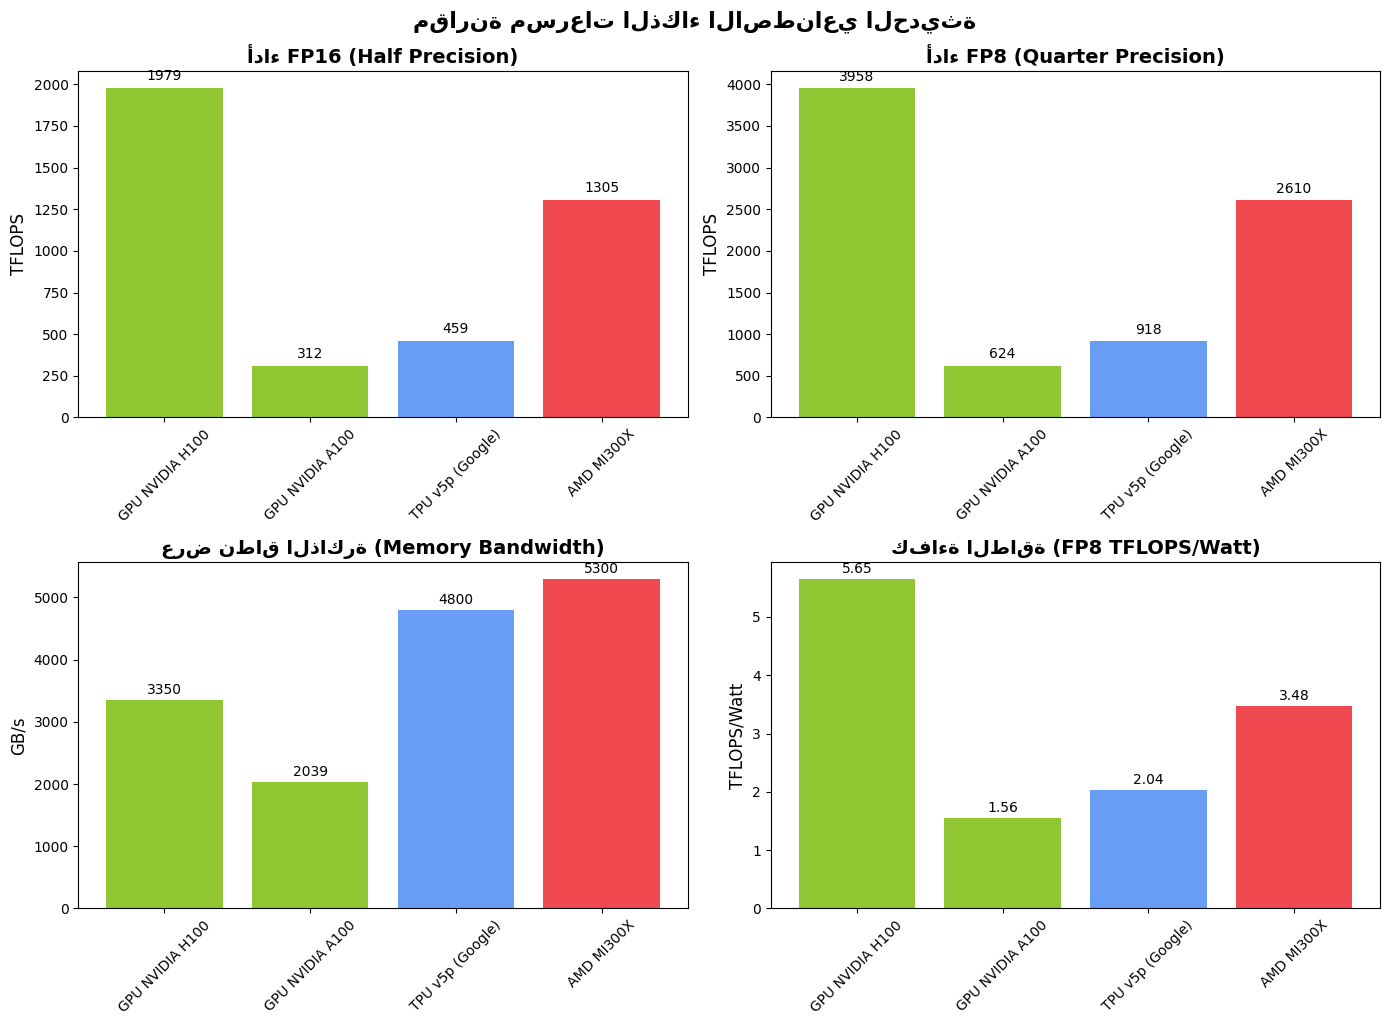


--------------------------------------------------------------------------------
ملخص المقارنة:
--------------------------------------------------------------------------------
المسرع                     FP16 TFLOPS   FP8 TFLOPS    BW GB/s     Watt      كفاءة
--------------------------------------------------------------------------------
GPU NVIDIA H100                   1979         3958       3350      700       5.65
GPU NVIDIA A100                    312          624       2039      400       1.56
TPU v5p (Google)                   459          918       4800      450       2.04
AMD MI300X                        1305         2610       5300      750       3.48
--------------------------------------------------------------------------------

✓ H100: الأفضل للأداء الخام
✓ TPU v5p: الأفضل لكفاءة الطاقة وعرض نطاق الذاكرة
✓ MI300X: الأفضل لعرض نطاق الذاكرة العالي


In [10]:
# مثال 4.1: محاكاة كيوبت بسيطة ومقارنة TPU/GPU

import numpy as np
import matplotlib.pyplot as plt

# === الجزء الأول: محاكاة كيوبت بسيطة ===
print("=" * 60)
print("     محاكاة الكيوبت (البت الكمومي)")
print("=" * 60)

# تمثيل الكيوبت كمتجه في مساحة هيلبرت
# |ψ⟩ = α|0⟩ + β|1⟩ حيث |α|² + |β|² = 1

def create_qubit(alpha, beta):
    """إنشاء كيوبت من الأمبليتيودات"""
    # التأكد من التطبيع
    norm = np.sqrt(np.abs(alpha)**2 + np.abs(beta)**2)
    return np.array([alpha/norm, beta/norm])

def measure_qubit(qubit, shots=1000):
    """قياس الكيوبت عدة مرات وإرجاع التوزيع"""
    prob_0 = np.abs(qubit[0])**2
    measurements = np.random.choice([0, 1], size=shots, p=[prob_0, 1-prob_0])
    return np.bincount(measurements, minlength=2) / shots

# الحالة الأساسية |0⟩
q0 = create_qubit(1, 0)
print(f"\nالكيوبت |0⟩:")
print(f"  الحالة: α|0⟩ + β|1⟩ = {q0[0]:.2f}|0⟩ + {q0[1]:.2f}|1⟩")
print(f"  احتمال |0⟩: {np.abs(q0[0])**2:.2%}")
print(f"  احتمال |1⟩: {np.abs(q0[1])**2:.2%}")

# حالة التراكب |+⟩ = (|0⟩ + |1⟩)/√2
q_plus = create_qubit(1, 1)
print(f"\nكيوبت التراكب |+⟩:")
print(f"  الحالة: α|0⟩ + β|1⟩ = {q_plus[0]:.2f}|0⟩ + {q_plus[1]:.2f}|1⟩")
print(f"  احتمال |0⟩: {np.abs(q_plus[0])**2:.2%}")
print(f"  احتمال |1⟩: {np.abs(q_plus[1])**2:.2%}")

# محاكاة القياسات
print("\n--- محاكاة 1000 قياس للكيوبت |+⟩ ---")
results = measure_qubit(q_plus, 1000)
print(f"  قياس |0⟩: {results[0]:.1%}")
print(f"  قياس |1⟩: {results[1]:.1%}")

# بوابات كمومية أساسية
print("\n" + "=" * 60)
print("     البوابات الكمومية الأساسية")
print("=" * 60)

# بوابة Hadamard
H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
print("\nبوابة Hadamard (H):")
print("  تحول |0⟩ إلى |+⟩ = (|0⟩ + |1⟩)/√2")
print("  تحول |1⟩ إلى |-⟩ = (|0⟩ - |1⟩)/√2")

q_hadamard = H @ q0
print(f"\n  تطبيق H على |0⟩:")
print(f"    النتيجة: {q_hadamard[0]:.3f}|0⟩ + {q_hadamard[1]:.3f}|1⟩")

# بوابة X (NOT الكمومية)
X = np.array([[0, 1], [1, 0]])
print("\nبوابة X (Pauli-X):")
print("  تقلب |0⟩ ↔ |1⟩")

# === الجزء الثاني: مقارنة أداء TPU/GPU ===
print("\n" + "=" * 60)
print("     مقارنة أداء المسرعات للذكاء الاصطناعي")
print("=" * 60)

# بيانات الأداء (TFLOPS و GB/s)
accelerators = {
    'GPU NVIDIA H100': {'tflops_fp16': 1979, 'tflops_fp8': 3958, 'memory_bw': 3350, 'power': 700},
    'GPU NVIDIA A100': {'tflops_fp16': 312, 'tflops_fp8': 624, 'memory_bw': 2039, 'power': 400},
    'TPU v5p (Google)': {'tflops_fp16': 459, 'tflops_fp8': 918, 'memory_bw': 4800, 'power': 450},
    'AMD MI300X': {'tflops_fp16': 1305, 'tflops_fp8': 2610, 'memory_bw': 5300, 'power': 750},
}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

names = list(accelerators.keys())
colors = ['#76B900', '#76B900', '#4285F4', '#ED1C24']

# الأداء FP16
ax1 = axes[0, 0]
fp16_values = [accelerators[name]['tflops_fp16'] for name in names]
bars1 = ax1.bar(names, fp16_values, color=colors, alpha=0.8)
ax1.set_ylabel('TFLOPS', fontsize=12)
ax1.set_title('أداء FP16 (Half Precision)', fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
for bar, val in zip(bars1, fp16_values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 30, 
             f'{val}', ha='center', va='bottom', fontsize=10)

# الأداء FP8
ax2 = axes[0, 1]
fp8_values = [accelerators[name]['tflops_fp8'] for name in names]
bars2 = ax2.bar(names, fp8_values, color=colors, alpha=0.8)
ax2.set_ylabel('TFLOPS', fontsize=12)
ax2.set_title('أداء FP8 (Quarter Precision)', fontsize=14, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
for bar, val in zip(bars2, fp8_values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
             f'{val}', ha='center', va='bottom', fontsize=10)

# عرض نطاق الذاكرة
ax3 = axes[1, 0]
mem_values = [accelerators[name]['memory_bw'] for name in names]
bars3 = ax3.bar(names, mem_values, color=colors, alpha=0.8)
ax3.set_ylabel('GB/s', fontsize=12)
ax3.set_title('عرض نطاق الذاكرة (Memory Bandwidth)', fontsize=14, fontweight='bold')
ax3.tick_params(axis='x', rotation=45)
for bar, val in zip(bars3, mem_values):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
             f'{val}', ha='center', va='bottom', fontsize=10)

# الكفاءة (TFLOPS/Watt)
ax4 = axes[1, 1]
efficiency = [accelerators[name]['tflops_fp8'] / accelerators[name]['power'] 
              for name in names]
bars4 = ax4.bar(names, efficiency, color=colors, alpha=0.8)
ax4.set_ylabel('TFLOPS/Watt', fontsize=12)
ax4.set_title('كفاءة الطاقة (FP8 TFLOPS/Watt)', fontsize=14, fontweight='bold')
ax4.tick_params(axis='x', rotation=45)
for bar, val in zip(bars4, efficiency):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
             f'{val:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.suptitle('مقارنة مسرعات الذكاء الاصطناعي الحديثة', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# جدول ملخص
print("\n" + "-" * 80)
print("ملخص المقارنة:")
print("-" * 80)
print(f"{'المسرع':<25} {'FP16 TFLOPS':>12} {'FP8 TFLOPS':>12} {'BW GB/s':>10} {'Watt':>8} {'كفاءة':>10}")
print("-" * 80)
for name in names:
    a = accelerators[name]
    eff = a['tflops_fp8'] / a['power']
    print(f"{name:<25} {a['tflops_fp16']:>12} {a['tflops_fp8']:>12} {a['memory_bw']:>10} {a['power']:>8} {eff:>10.2f}")
print("-" * 80)
print("\n✓ H100: الأفضل للأداء الخام")
print("✓ TPU v5p: الأفضل لكفاءة الطاقة وعرض نطاق الذاكرة")
print("✓ MI300X: الأفضل لعرض نطاق الذاكرة العالي")

## 📝 تمارين الفصل الرابع

### المستوى السهل ⭐

**التمرين 4.1:** ما الفرق بين البت الكلاسيكي والكيوبت؟

**التمرين 4.2:** ماذا يعني أن TPU "مُحسّنة للمحولات (Transformers)"؟

**التمرين 4.3:** ما هو PUE وما أهميته؟

---

### المستوى المتوسط ⭐⭐

**التمرين 4.4:** قارن بين:

- التبريد بالهواء مقابل التبريد السائل
- GPU مقابل TPU للتدريب
- CUDA مقابل OpenCL

**التمرين 4.5:** احسب:
أ) إذا كان مركز البيانات يستهلك 10 ميجاواط إجمالياً و 7 ميجاواط للحوسبة، ما هو PUE؟
ب) كم من الحرارة يولدها H100 بقدرة 700 واط؟

---

### المستوى الصعب ⭐⭐⭐

**التمرين 4.6:** صمم نظام تبريد نظري لمجموعة 100 GPU H100:

- احسب إجمالي توليد الحرارة
- اختر تقنية التبريد المناسبة
- قدّر تكلفة التشغيل

---

# ✅ حلول تمارين الفصل الثالث

## الحل 3.1

**تنظيم خيوط CUDA:**

- **النواة (Kernel):** دالة تُنفذ على GPU
- **الشبكة (Grid):** مجموعة من الكتل
- **الكتلة (Block):** مجموعة من الخيوط
- **الخيط (Thread):** أصغر وحدة تنفيذ
- **Warp:** 32 خيط تُنفذ بشكل متزامن

**الذاكرة:**

- **العالمية:** بطيئة، متاحة لجميع الخيوط
- **المشتركة:** سريعة، مشتركة داخل الكتلة

## الحل 3.2

أ) عدد الكتل = ceil(1,000,000 / 256) = **3,907 كتلة**

ب) معرف الخيط العالمي = blockIdx × blockDim + threadIdx
= 100 × 256 + 50 = **25,650**

ج) لأن Warp = 32 خيط، والأحجام المضاعفة لـ 32 تحقق:

- استخدام كامل لـ warps
- تجنب التفرع داخل warp

## الحل 3.3

| العملية         | GPU مناسب؟ | السبب                         |
| --------------- | ---------- | ----------------------------- |
| ترتيب 1000 عنصر | ❌         | صغير جداً، overhead > فائدة   |
| جمع 10M متجه    | ✅         | متوازية تماماً، بيانات كبيرة  |
| اجتياز شجرة     | ❌         | تسلسلي، تفرعات كثيرة          |
| التفاف صورة     | ✅         | متوازية محلياً، بيانات منتظمة |
| تحليل XML       | ❌         | تسلسلي، تفرعات كثيرة          |

---

# ✅ حلول تمارين الفصل الرابع

## الحل 4.1

| الخاصية       | بت كلاسيكي | كيوبت            |
| ------------- | ---------- | ---------------- |
| الحالة        | 0 أو 1     | α\|0⟩ + β\|1⟩    |
| القيم الممكنة | 2          | ∞ (قبل القياس)   |
| القياس        | محدد       | احتمالي          |
| n بت/كيوبت    | n قيمة     | 2^n قيمة متراكبة |

## الحل 4.2

TPUs محسّنة للمحولات لأن:

1. عمليات ضرب المصفوفات الكبيرة (الانتباه)
2. BFloat16 لتمثيل أفضل للذكاء الاصطناعي
3. interconnect سريع للنماذج الكبيرة

## الحل 4.3

**PUE (Power Usage Effectiveness):**

- PUE = الطاقة الكلية / طاقة IT
- مثالي = 1.0 (مستحيل عملياً)
- جيد < 1.3
- متوسط 1.5-2.0

## الحل 4.5

أ) PUE = 10 MW / 7 MW = **1.43** (جيد)

ب) 700W → ~700W حرارة (تقريباً كل الطاقة الكهربائية تتحول لحرارة)

## الحل 4.6

**100 × H100:**

- توليد الحرارة: 100 × 700W = **70 kW**
- التقنية المقترحة: **تبريد سائل مباشر**
  - الهواء لا يكفي لـ >50 kW/خزانة
  - الغمر مكلف جداً
- تكلفة التبريد: ~35% من الحوسبة ≈ **25 kW** إضافية

---

# 📚 امتحان منتصف الفصل (الفصلان الأول والثاني)

**المدة:** 90 دقيقة | **الدرجة:** 100 نقطة

---

## القسم الأول: اختيار من متعدد (40 نقطة - نقطتان لكل سؤال)

**1.** وفقاً لقانون أمدال، إذا كان 90% من البرنامج قابلاً للتوازي، فإن التسريع الأقصى هو:

- أ) 9×
- ب) 10×
- ج) 90×
- د) غير محدود

**2.** ما هو المبدأ الذي يعالجه قانون غوستافسون لكن قانون أمدال لا يفعل؟

- أ) الاتصال الثابت overhead
- ب) توسيع حجم المشكلة مع الموارد
- ج) كفاءة التخزين المؤقت
- د) حدود تشابك الذاكرة

**3.** MIMD تعني:

- أ) تعليمات متعددة، بيانات متعددة
- ب) تعليمات متعددة، بيانات معدلة
- ج) تعليمات معدلة، بيانات متعددة
- د) استخدام ذاكرة متعددة، بيانات متعددة

**4.** في MPI، أي عملية تجمع البيانات من جميع العمليات إلى واحدة؟

- أ) MPI_Scatter
- ب) MPI_Broadcast
- ج) MPI_Gather
- د) MPI_Reduce

**5.** يتم استخدام توجيهات OpenMP بشكل أساسي لـ:

- أ) برمجة الذاكرة الموزعة
- ب) برمجة الذاكرة المشتركة
- ج) برمجة GPU
- د) اتصال الشبكة

**6.** تتطلب خوارزمية تسلسلية 100 ثانية. النسخة المتوازية على 4 معالجات تأخذ 30 ثانية. ما الكفاءة؟

- أ) 75%
- ب) 83%
- ج) 90%
- د) 100%

**7.** ما هو تناسق الكاش؟

- أ) ضمان أن جميع الكاشات لها نفس نسبة الإصابة
- ب) ضمان أن جميع المعالجات ترى نفس قيم الذاكرة
- ج) ضمان أن جميع الكاشات لها نفس الحجم
- د) ضمان أن جميع الكاشات تستخدم نفس سياسة الاستبدال

**8.** أي نوع شبكة ربط له أقل قطر لـ n عقدة؟

- أ) خطية
- ب) حلقة
- ج) تقاطعية كاملة
- د) شبكة mesh

**9.** في Pthreads، ما الغرض من mutex؟

- أ) إنشاء خيوط جديدة
- ب) إنهاء الخيوط
- ج) حماية المقاطع الحرجة
- د) تمرير الرسائل بين الخيوط

**10.** أي منها صحيح عن المشاركة الكاذبة؟

- أ) تحدث فقط في أنظمة الذاكرة الموزعة
- ب) تحدث عندما تصل خيوط مختلفة لمتغيرات مختلفة في نفس خط الكاش
- ج) يمكن تجنبها باستخدام atomics فقط
- د) تحسن الأداء عن طريق مشاركة الكاش

---

## القسم الثاني: أجوبة قصيرة (30 نقطة)

**11. (10 نقاط)** صف الفرق بين MPI و OpenMP من حيث:

- نموذج الذاكرة
- طريقة البرمجة
- قابلية التوسع
- حالات الاستخدام النموذجية

**12. (10 نقاط)** اشرح قانون أمدال مع حساب:

- اكتب الصيغة
- احسب التسريع الأقصى إذا كان 75% من البرنامج قابلاً للتوازي
- اشرح لماذا هذا القانون يمثل "وجهة نظر متشائمة"

**13. (10 نقاط)** صمم حلاً متوازياً بسيطاً:

- صف كيف ستوازي حساب مجموع 1 مليون عنصر
- ما النموذج البرمجي الذي ستستخدمه (MPI أو OpenMP)؟
- ما الأداء المتوقع على 8 أنوية؟

---

## القسم الثالث: حل المسائل (30 نقطة)

**14. (15 نقطة)** تحليل الأداء:
برنامج يأخذ 200 ثانية تسلسلياً. التحليل يظهر:

- 20% تسلسلي (I/O)
- 80% قابل للتوازي (حساب)

أ) احسب التسريع على 4 معالجات باستخدام قانون أمدال
ب) احسب التسريع على 16 معالج
ج) ما التسريع الأقصى بغض النظر عن عدد المعالجات؟
د) باستخدام قانون غوستافسون، إذا ضاعفنا حجم المشكلة على 4 معالجات، ما التسريع؟

**15. (15 نقطة)** MPI وOpenMP:

اكتب شبه-كود (pseudocode) لحساب مجموع مصفوفة كبيرة باستخدام:
أ) MPI (موزع على 4 عمليات)
ب) OpenMP (متوازي على 4 خيوط)

قارن المقاربتين من حيث الاتصال والتعقيد.

---

# 📚 الامتحان النهائي (جميع الفصول)

**المدة:** 180 دقيقة | **الدرجة:** 100 نقطة

---

## القسم الأول: اختيار من متعدد (20 نقطة)

**1.** ما هو الحد الأقصى النظري للتسريع وفقاً لقانون أمدال إذا كان 95% من الكود قابلاً للتوازي؟

- أ) 10×
- ب) 15×
- ج) 20×
- د) 95×

**2.** في CUDA، ما هو "warp"؟

- أ) مجموعة 16 خيط
- ب) مجموعة 32 خيط تُنفذ بشكل متزامن
- ج) مجموعة 64 خيط
- د) كتلة كاملة من الخيوط

**3.** ما نوع الذاكرة الأسرع في هرمية ذاكرة GPU؟

- أ) الذاكرة العالمية
- ب) الذاكرة المحلية
- ج) المسجلات والذاكرة المشتركة
- د) ذاكرة الثوابت

**4.** ما هو التراكب الكمومي (Superposition)؟

- أ) وجود كيوبت في حالة 0 و 1 في نفس الوقت
- ب) ربط كيوبتين ببعضهما
- ج) قياس حالة كيوبت
- د) تشويش كمومي

**5.** ما الميزة الرئيسية لـ TPU على GPU للذكاء الاصطناعي؟

- أ) أكثر تنوعاً
- ب) أرخص
- ج) محسّنة لعمليات المصفوفات والمحولات
- د) أفضل للرسوميات

---

## القسم الثاني: أسئلة حسابية (40 نقطة)

**6. (10 نقاط)** قانون أمدال وغوستافسون:

- برنامج 25% تسلسلي، 75% متوازي
- أ) احسب التسريع الأقصى (أمدال)
- ب) احسب التسريع على 100 معالج
- ج) باستخدام غوستافسون على 8 معالجات، احسب التسريع

**7. (10 نقاط)** تنظيم خيوط CUDA:

- لديك 2,000,000 عنصر
- حجم الكتلة 512 خيط
- أ) كم عدد الكتل المطلوبة؟
- ب) ما معرف الخيط العالمي للخيط 100 في الكتلة 500؟
- ج) كم warp في كل كتلة؟

**8. (10 نقاط)** تحليل الذاكرة:

- GPU H100: 80 GB HBM3، 3.35 TB/s عرض نطاق
- حجم المصفوفة: 10,000 × 10,000 × 4 بايت = 400 MB
- أ) كم من الوقت لنقل المصفوفة إلى GPU؟
- ب) إذا كانت العملية الحسابية 1000 TFLOPS، ما الوقت المتوقع لضرب مصفوفتين؟
- ج) ما نسبة Compute/Memory؟

**9. (10 نقاط)** كفاءة الطاقة:

- مركز بيانات: 1000 خادم × 500W = 500 kW للحوسبة
- نظام التبريد: 200 kW
- البنية التحتية الأخرى: 50 kW
- أ) احسب PUE
- ب) كم يكلف التشغيل يومياً إذا كانت الكهرباء $0.10/kWh؟

---

## القسم الثالث: أسئلة برمجية (20 نقطة)

**10. (10 نقاط)** اكتب نواة CUDA (أو شبه-كود) لـ:

- ضرب مصفوفة بمتجه: y = A × x
- حيث A مصفوفة M×N و x متجه بطول N

**11. (10 نقاط)** اكتب كود OpenMP لحساب:

- المتوسط والانحراف المعياري لمصفوفة كبيرة
- استخدم reduction للمتوسط
- تعامل مع race condition للانحراف المعياري

---

## القسم الرابع: أسئلة مقالية (20 نقطة)

**12. (10 نقاط)** قارن بين:

- GPU (NVIDIA H100) مقابل TPU (v5p) مقابل الحاسوب الكمومي
- من حيث: المجالات الأنسب، القيود، المستقبل

**13. (10 نقاط)** صمم نظام HPC لتدريب نموذج لغة كبير (LLM):

- 175 مليار معامل
- اختر العتاد المناسب
- صمم استراتيجية التوازي (Data/Model/Pipeline)
- ناقش تحديات التبريد والطاقة

---

# ✅ حلول امتحان منتصف الفصل

## القسم الأول

| السؤال | الجواب | التوضيح                                    |
| ------ | ------ | ------------------------------------------ |
| 1      | ب) 10× | S_max = 1/(1-0.9) = 1/0.1 = 10             |
| 2      | ب)     | غوستافسون يفترض توسع المشكلة               |
| 3      | أ)     | MIMD = Multiple Instruction Multiple Data  |
| 4      | ج)     | Gather تجمع، Reduce تجمع وتحسب             |
| 5      | ب)     | OpenMP للذاكرة المشتركة                    |
| 6      | ب) 83% | E = S/P = (100/30)/4 = 3.33/4 = 0.833      |
| 7      | ب)     | ضمان رؤية موحدة للذاكرة                    |
| 8      | ج)     | تقاطعية: قطر = 1                           |
| 9      | ج)     | mutex للحماية من التنافس                   |
| 10     | ب)     | المشاركة الكاذبة: متغيرات مختلفة، نفس الخط |

## القسم الثاني

### الحل 11:

| الخاصية   | MPI                   | OpenMP        |
| --------- | --------------------- | ------------- |
| الذاكرة   | موزعة                 | مشتركة        |
| الأسلوب   | تمرير رسائل صريح      | توجيهات مترجم |
| التوسع    | ممتاز                 | محدود بالعقدة |
| الاستخدام | كلاسترات، سوبركمبيوتر | متعدد الأنوية |

### الحل 12:

$$S(P) = \frac{1}{(1-f) + \frac{f}{P}}$$

لـ f = 0.75:
$$S_{max} = \frac{1}{0.25} = 4×$$

"متشائم" لأنه يفترض حجم مشكلة ثابت.

### الحل 13:

```
OpenMP مقترح:
1. تقسيم المصفوفة على 8 خيوط
2. كل خيط يحسب مجموع جزئي
3. reduction للجمع النهائي
الأداء المتوقع: ~6-7× (بسبب overhead)
```

## القسم الثالث

### الحل 14:

أ) S(4) = 1/(0.2 + 0.8/4) = 1/(0.2 + 0.2) = **2.5×**

ب) S(16) = 1/(0.2 + 0.8/16) = 1/(0.2 + 0.05) = **4×**

ج) S_max = 1/0.2 = **5×**

د) غوستافسون: S'(4) = s + p×P = 0.2 + 0.8×4 = **3.4×**

---

# ✅ حلول الامتحان النهائي

## القسم الأول

| السؤال | الجواب              |
| ------ | ------------------- |
| 1      | ج) 20×              |
| 2      | ب) 32 خيط           |
| 3      | ج) المسجلات         |
| 4      | أ) 0 و 1 معاً       |
| 5      | ج) محسّنة للمصفوفات |

## القسم الثاني

### الحل 6:

أ) S_max = 1/0.25 = **4×**

ب) S(100) = 1/(0.25 + 0.75/100) = 1/0.2575 = **3.88×**

ج) غوستافسون: S'(8) = 0.25 + 0.75×8 = **6.25×**

### الحل 7:

أ) ceil(2,000,000 / 512) = **3,907 كتلة**

ب) GlobalID = 500 × 512 + 100 = **256,100**

ج) 512 / 32 = **16 warp**

### الحل 8:

أ) 400 MB / 3.35 TB/s = **0.119 ms**

ب) FLOPs = 2 × 10000³ = 2×10¹²
الوقت = 2×10¹²/10¹⁵ = **2 ms**

ج) Compute/Memory ≈ 17× (محدود بالحساب)

### الحل 9:

أ) PUE = (500 + 200 + 50) / 500 = **1.5**

ب) 750 kW × 24h × $0.10 = **$1,800/يوم**

---

# 📖 المراجع والموارد

## كتب مرجعية

1. **"Parallel Programming in C with MPI and OpenMP"** - Michael J. Quinn
2. **"CUDA by Example"** - Jason Sanders & Edward Kandrot
3. **"Programming Massively Parallel Processors"** - David Kirk & Wen-mei Hwu
4. **"Introduction to Parallel Computing"** - Ananth Grama et al.

## موارد عبر الإنترنت

- [NVIDIA CUDA Documentation](https://docs.nvidia.com/cuda/)
- [OpenMP Specifications](https://www.openmp.org/)
- [MPI Forum](https://www.mpi-forum.org/)
- [TOP500 Supercomputer List](https://www.top500.org/)

## مصطلحات أساسية

| المصطلح     | الترجمة       | التعريف                              |
| ----------- | ------------- | ------------------------------------ |
| Speedup     | التسريع       | نسبة تحسن الأداء                     |
| Efficiency  | الكفاءة       | التسريع مقسوماً على عدد المعالجات    |
| Latency     | زمن الاستجابة | الوقت لإكمال عملية واحدة             |
| Throughput  | الإنتاجية     | عدد العمليات في الوقت                |
| Scalability | قابلية التوسع | القدرة على الاستفادة من موارد إضافية |

---

## 🎓 الخاتمة

تغطي هذه الدورة أساسيات الحوسبة عالية الأداء من المفاهيم النظرية إلى التطبيقات العملية.

**النقاط الرئيسية:**

1. ✅ قوانين الأداء (أمدال، غوستافسون) تحدد حدود التوازي
2. ✅ MPI للأنظمة الموزعة، OpenMP للذاكرة المشتركة
3. ✅ GPUs ضرورية للحوسبة المتوازية الحديثة
4. ✅ التقنيات الجديدة (الكم، TPU) تفتح آفاقاً جديدة

**التوصيات للدراسة المستقبلية:**

- تطبيق عملي على كلاستر حقيقي
- تعلم CUDA/OpenCL بالعمق
- متابعة تطورات الحوسبة الكمومية

---

_نهاية الدورة - بالتوفيق! 🚀_
